In [1]:
%pylab inline

import os, pres_style

Populating the interactive namespace from numpy and matplotlib


In [2]:
idir = os.path.expandvars("$master/inputs/tta_cb13")
fl = sorted([file for root, subs, files in os.walk("{}/ssag".format(idir)) for file in files])

In [3]:
fields = "input_file u g r i z".split()
dtypes = ["|10S"]+5*[float]
ssag_catalog = zeros(140, dtype=zip(fields, dtypes))
for j, file in enumerate(fl):
    f = open("{}/ssag/{}".format(idir, file), "r")
    for i in xrange(9): f.readline()

    ssag_catalog[fields[0]][j] = file.rstrip(".txt")
    for i in xrange(5): ssag_catalog[fields[i+1]][j] = eval(f.readline()[:-1].split("=")[1])

savetxt("{}/ssag_catalog.txt".format(idir), ssag_catalog, fmt="%12s"+"%9.5f"*5, header=("%10s"+"%9s"*5)%tuple(fields))

/home/mejia/Programs/miniconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


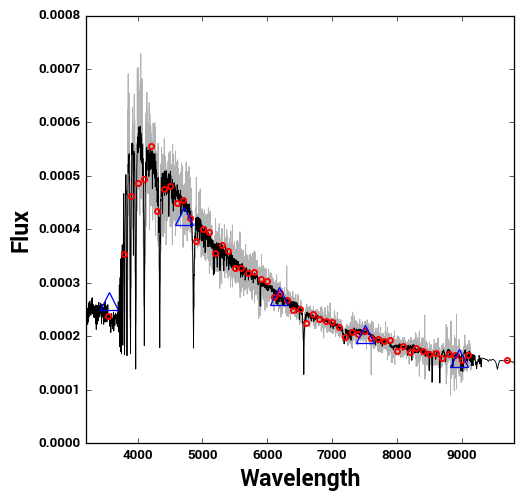

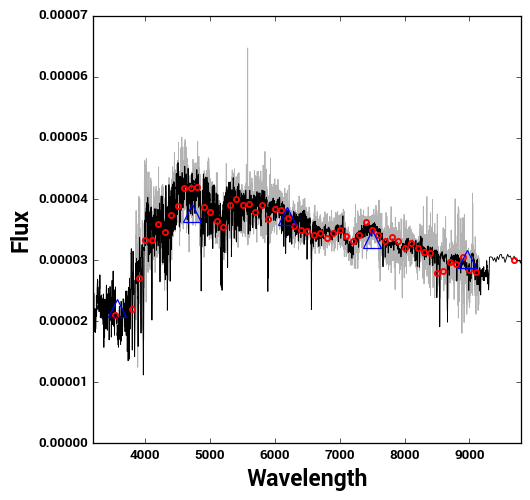

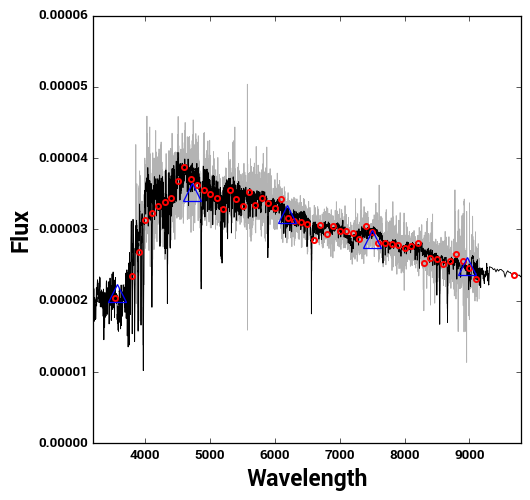

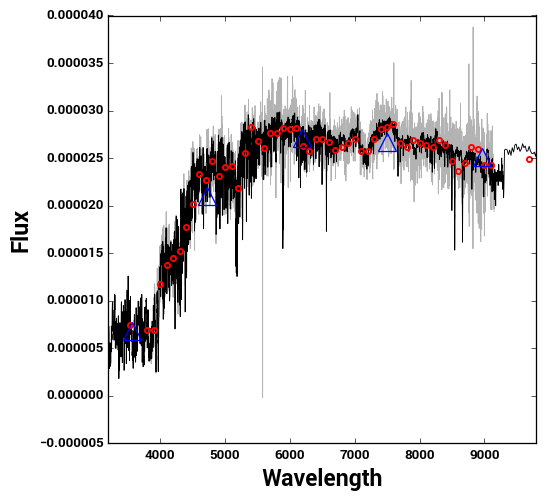

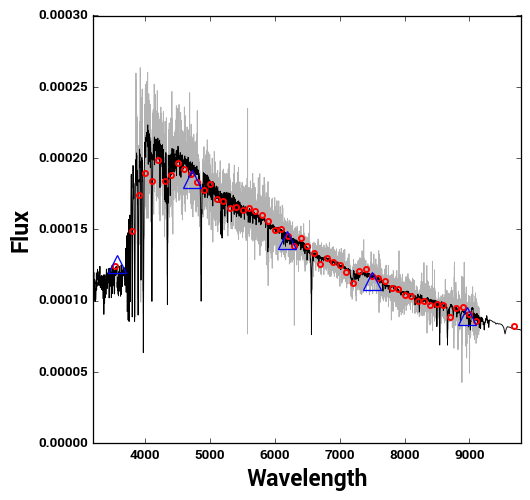

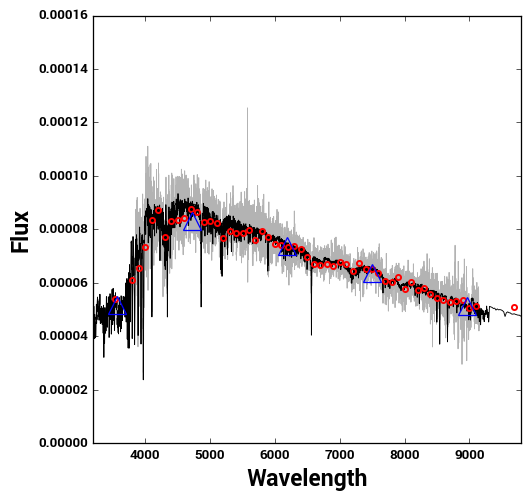

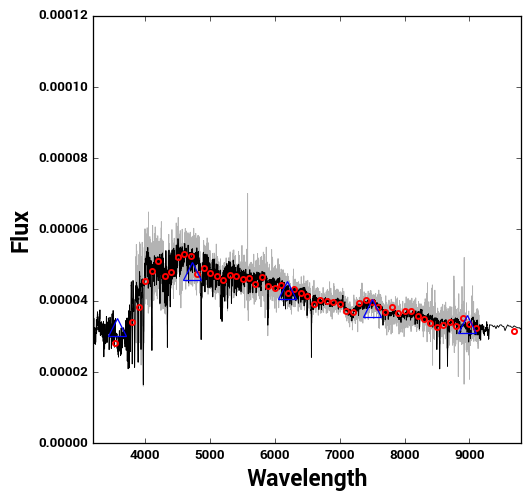

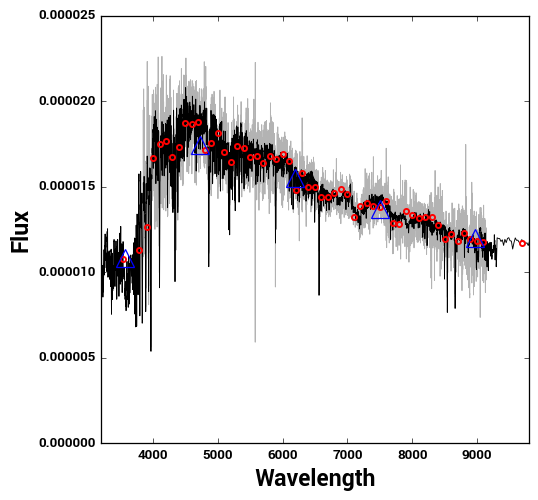

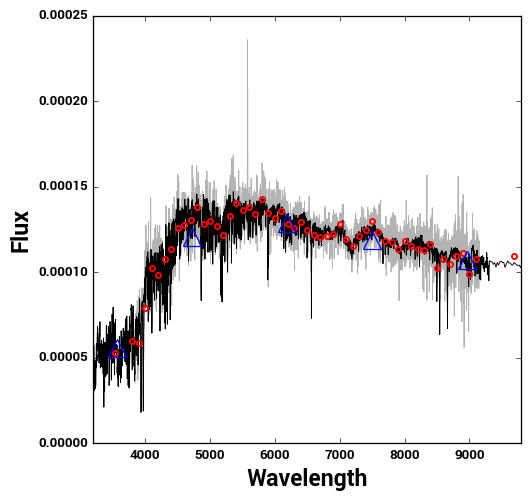

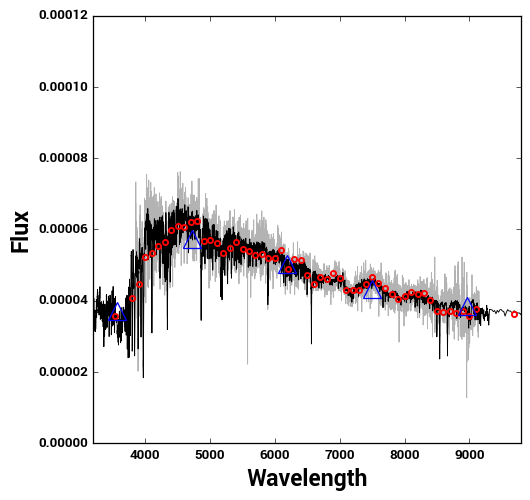

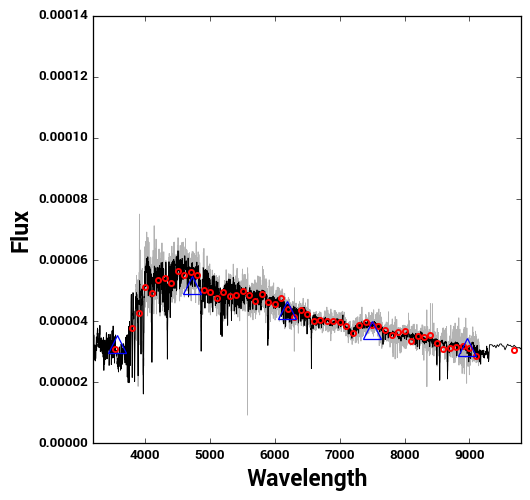

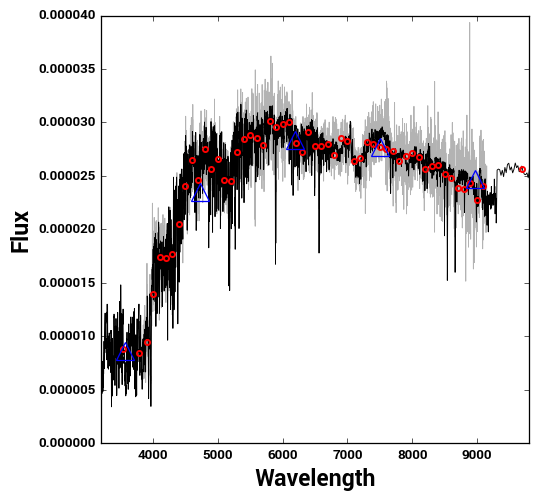

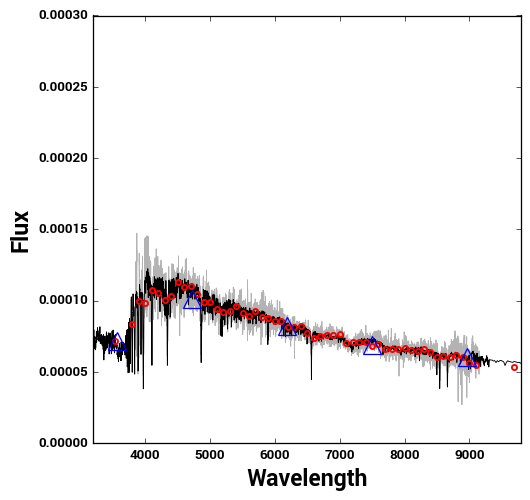

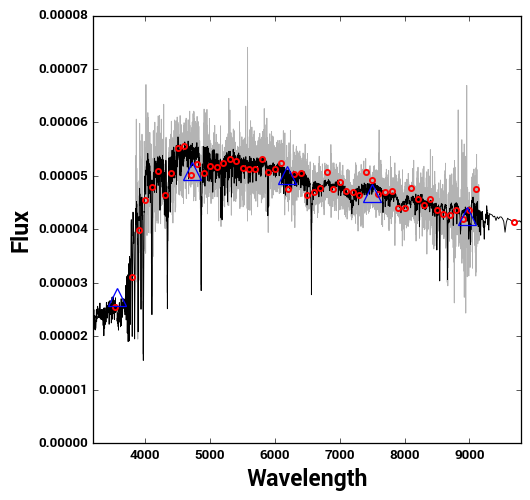

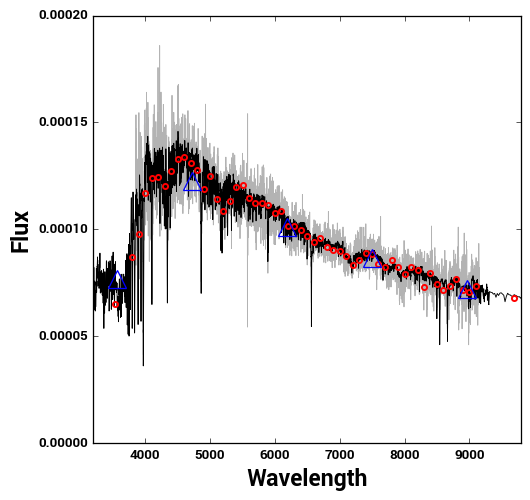

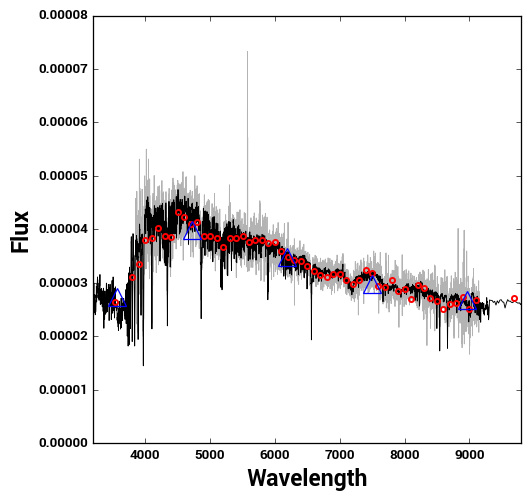

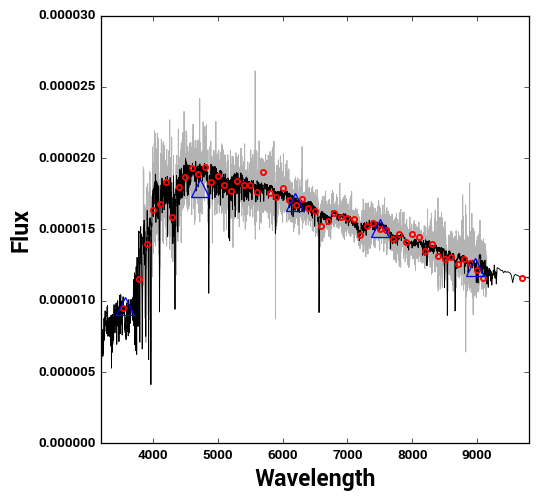

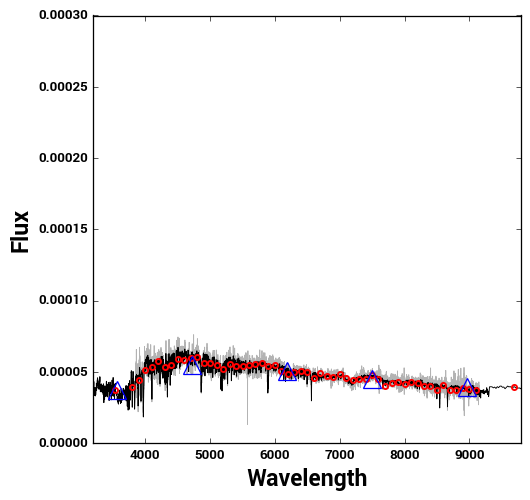

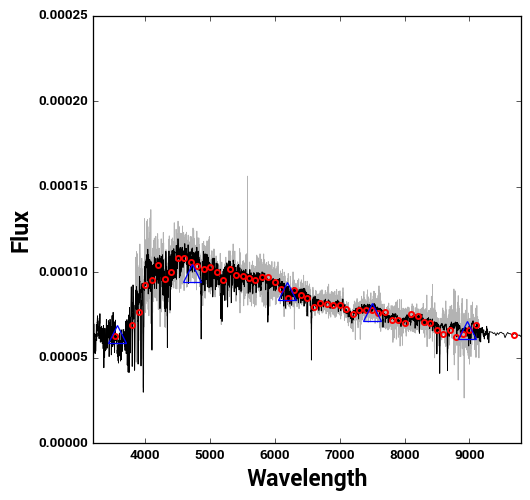

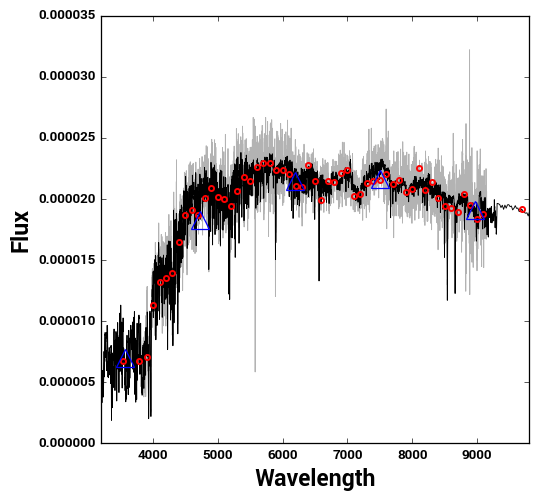

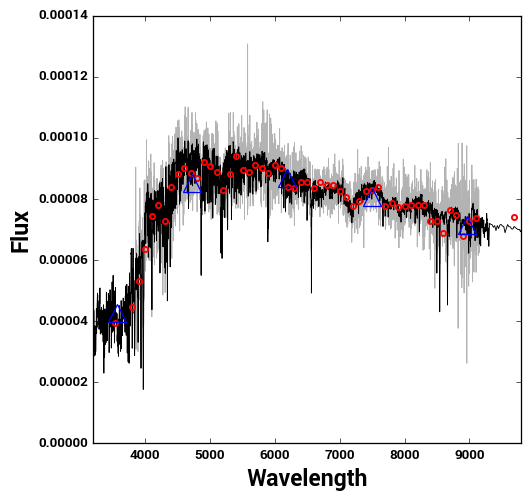

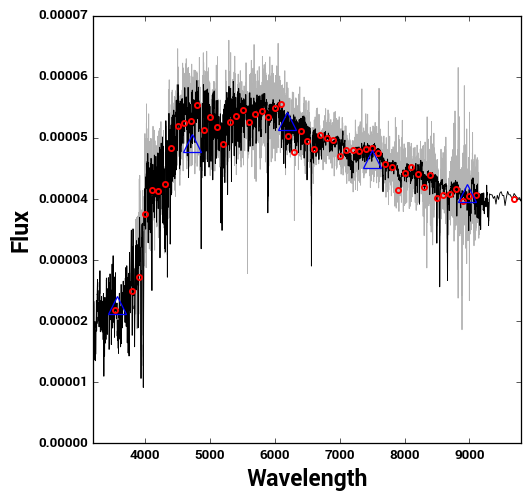

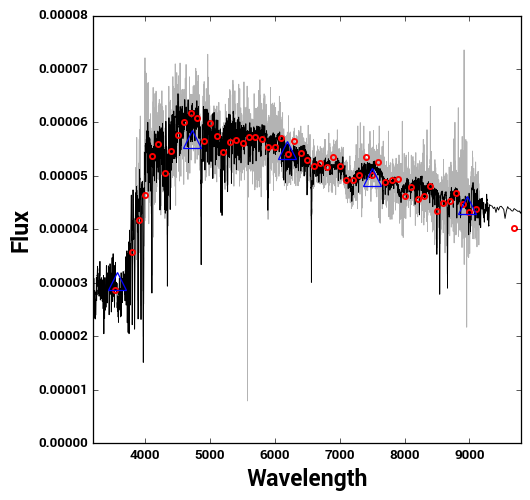

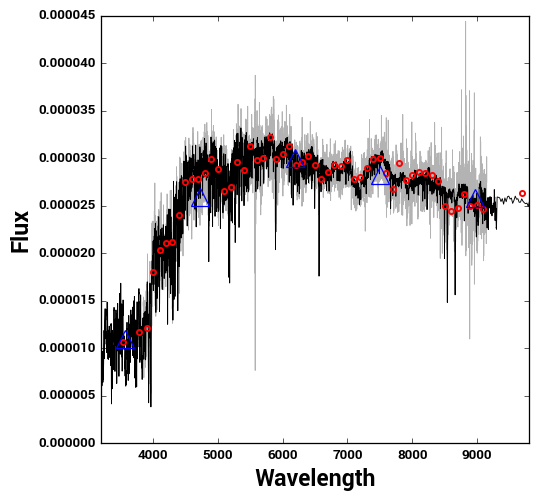

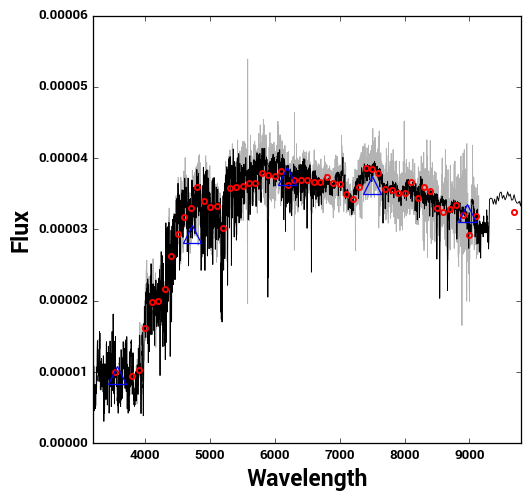

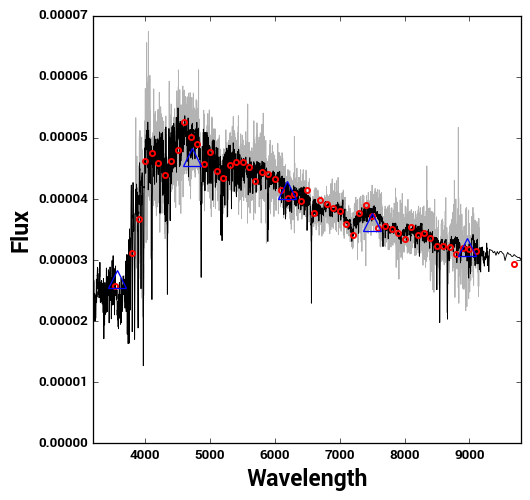

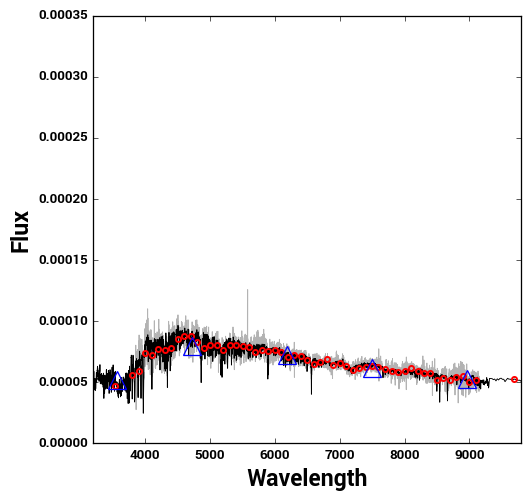

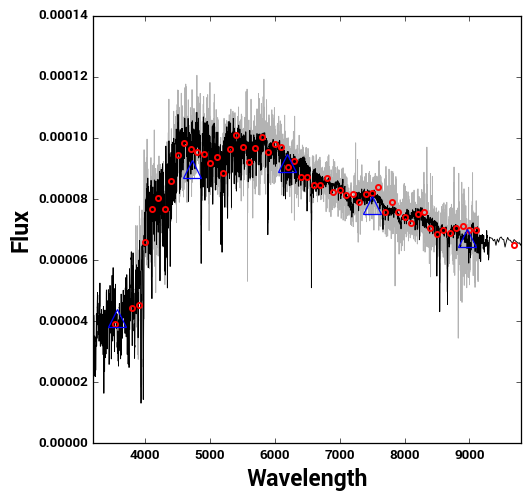

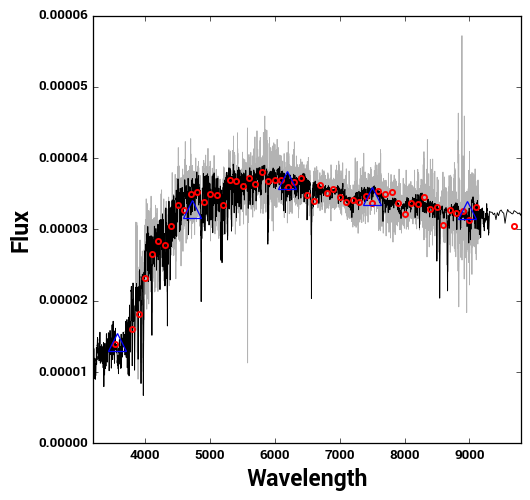

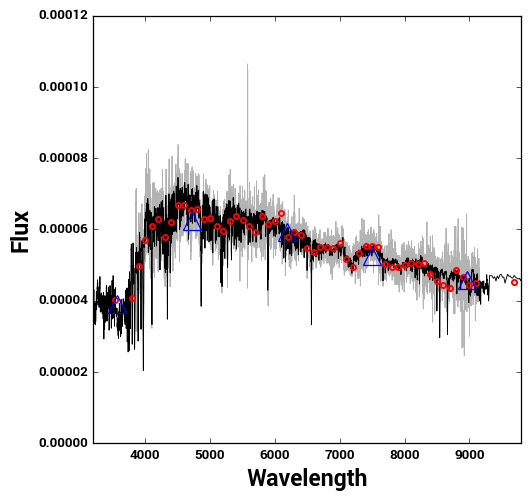

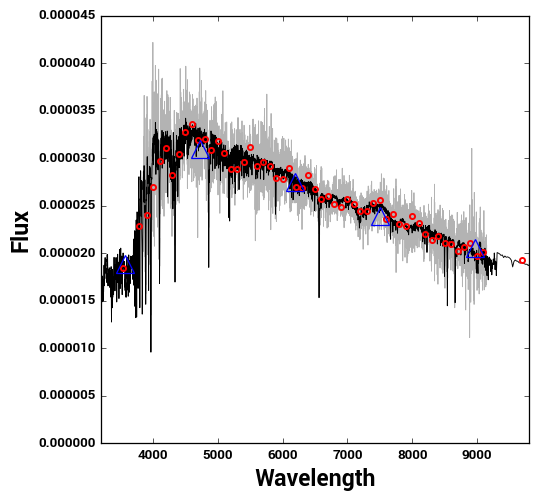

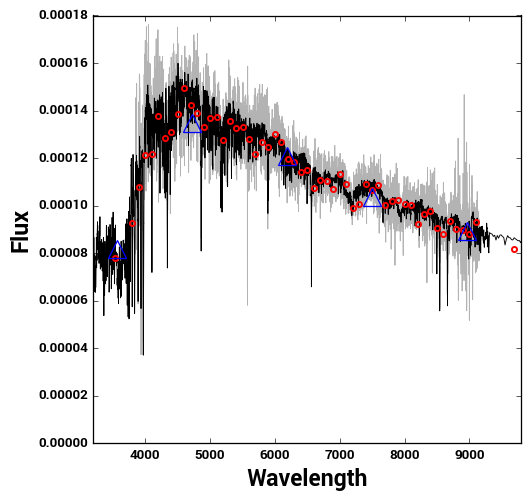

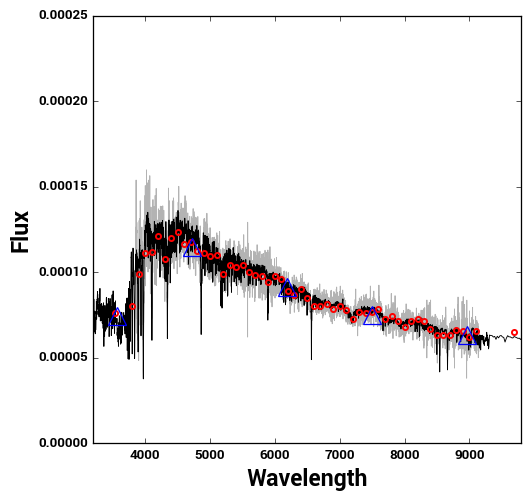

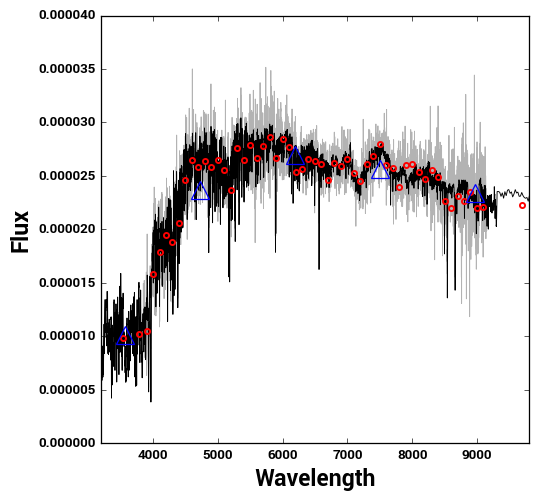

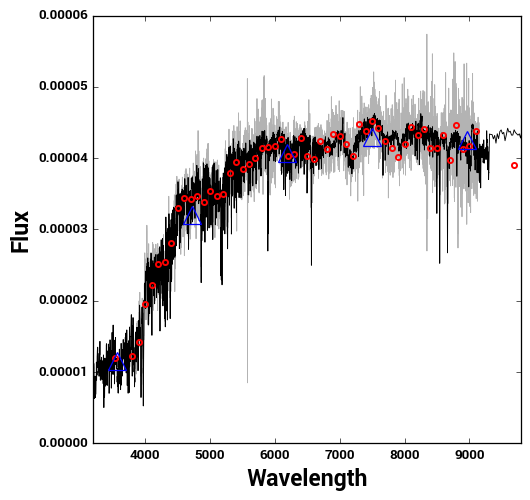

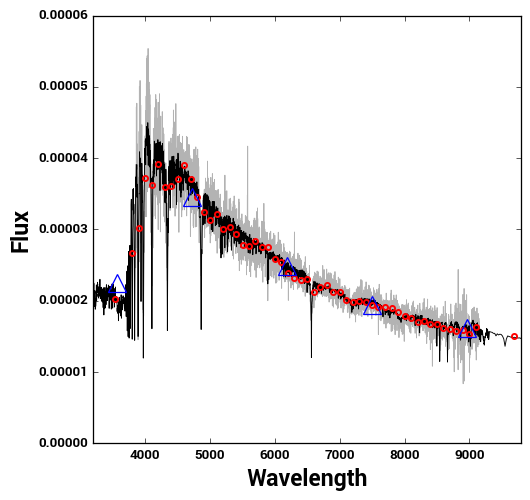

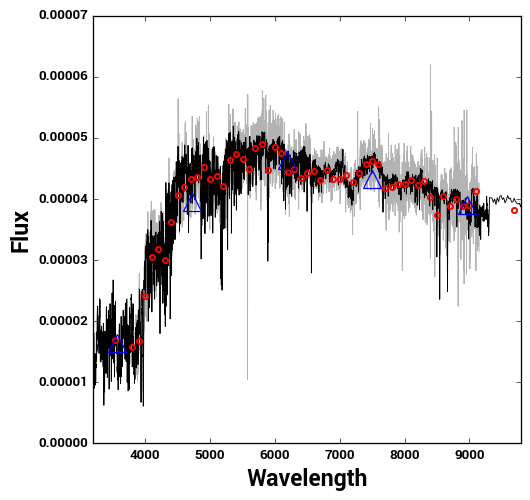

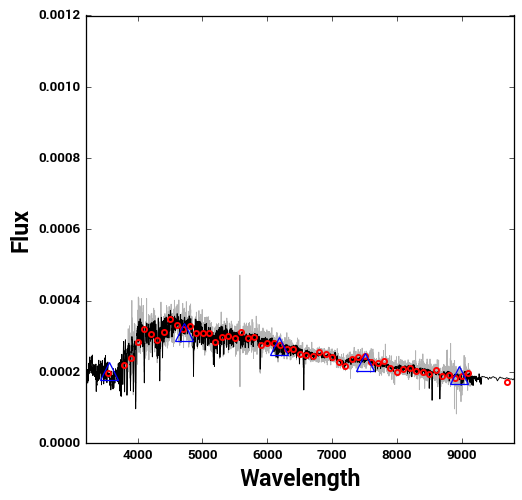

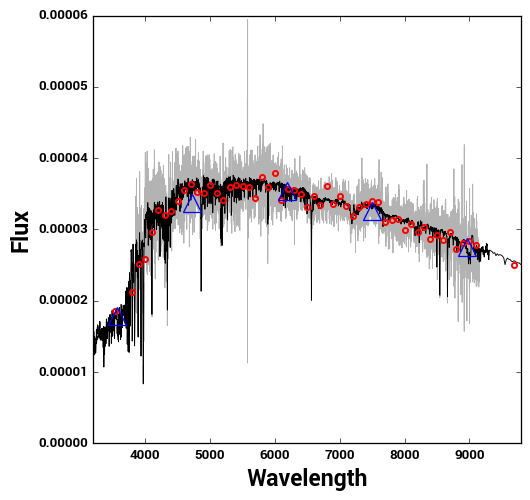

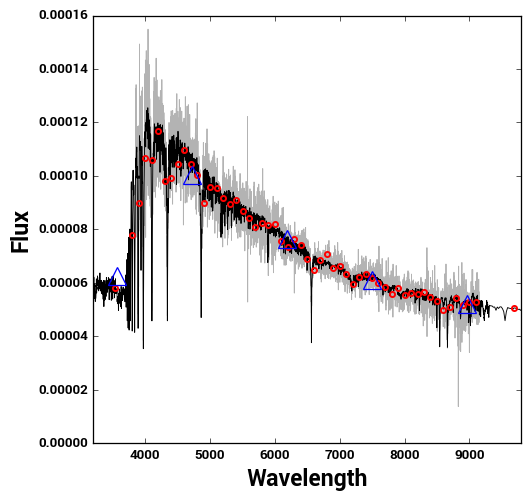

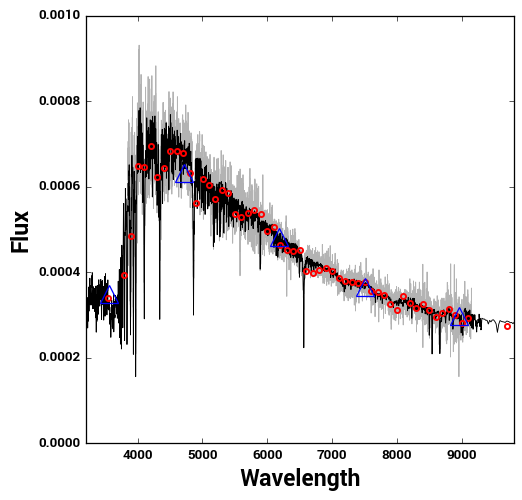

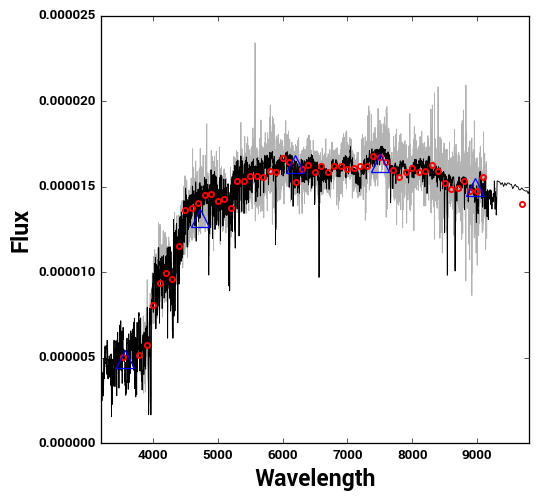

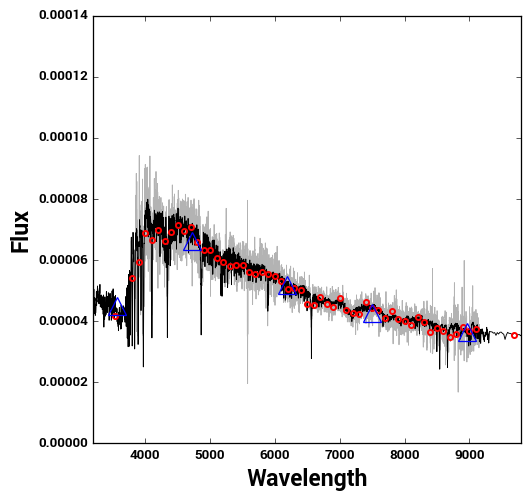

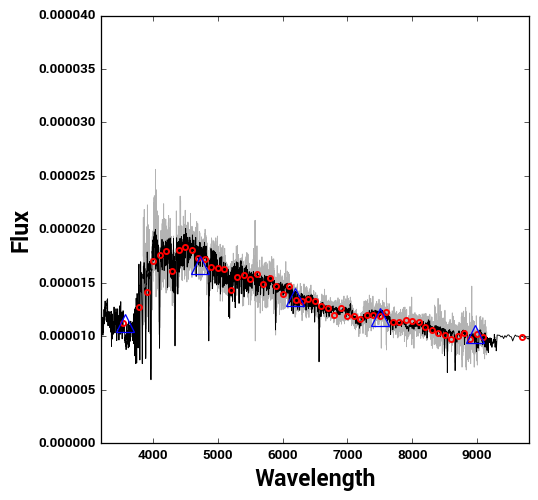

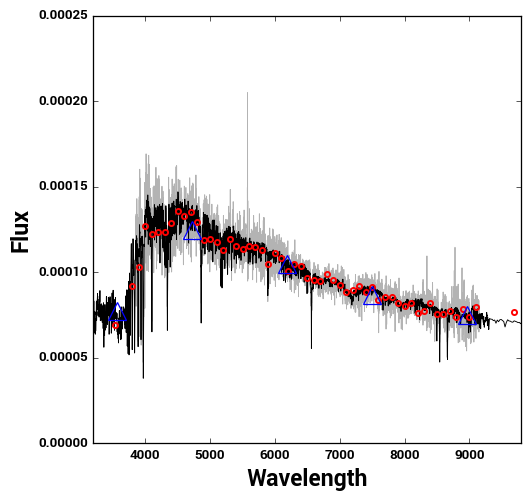

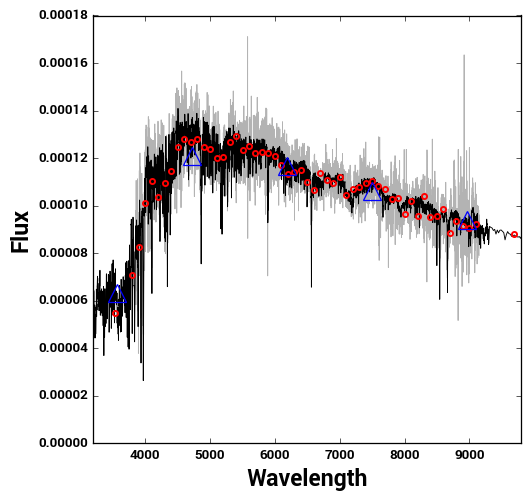

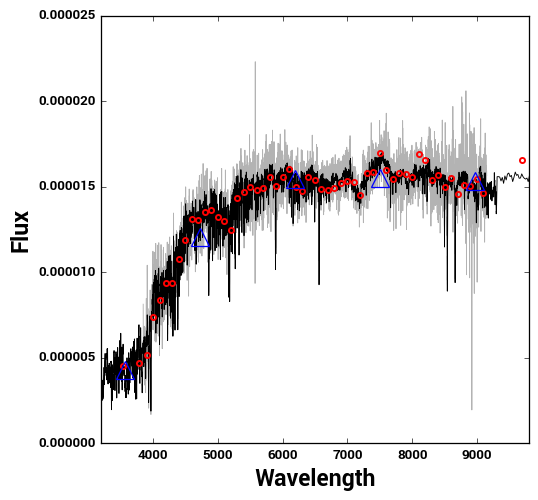

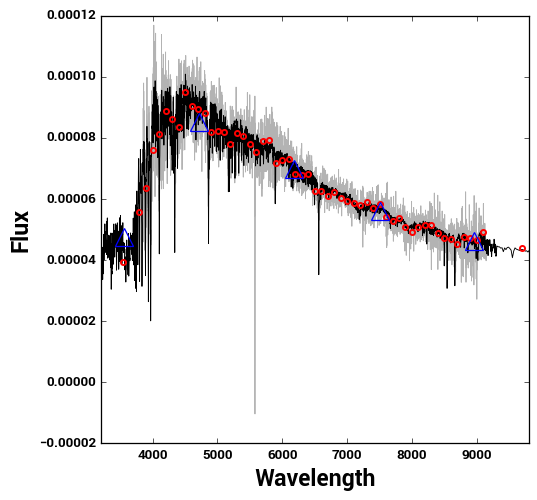

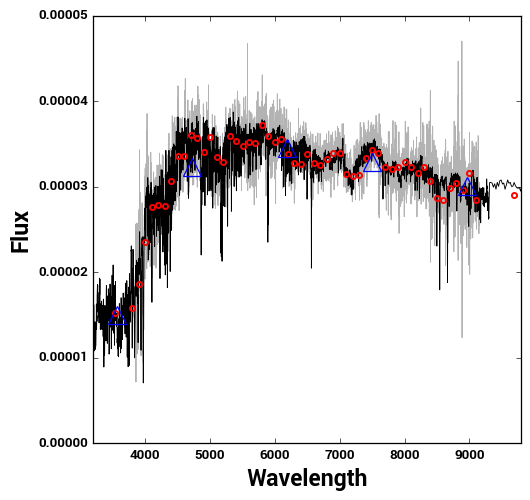

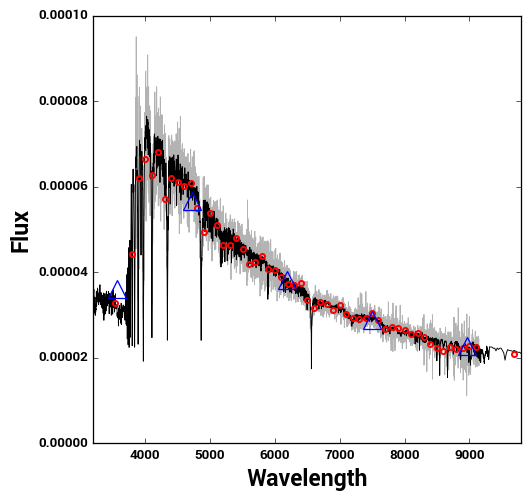

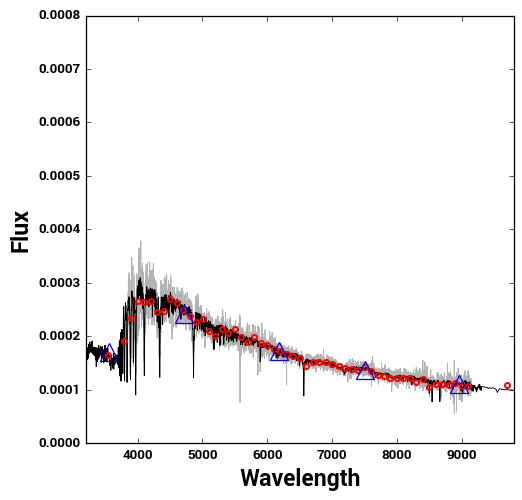

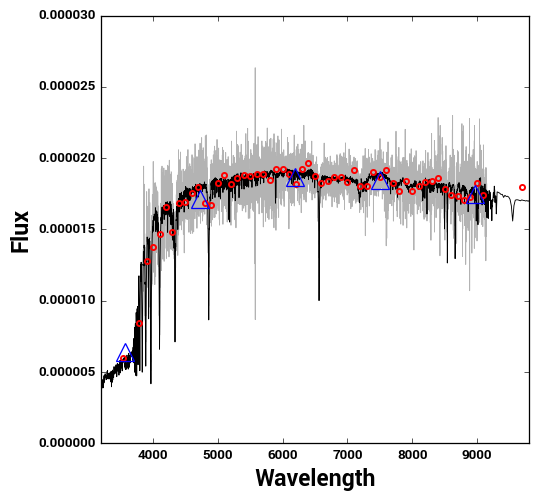

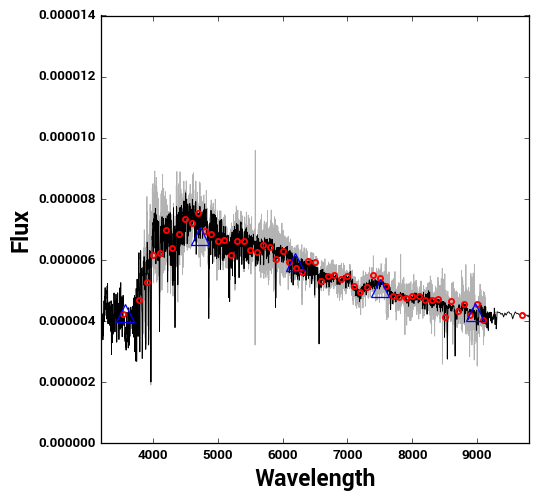

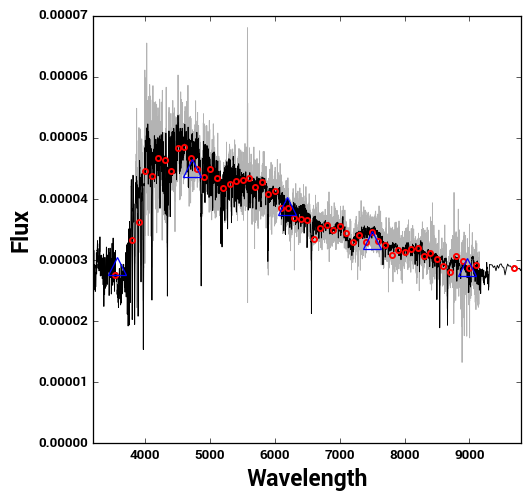

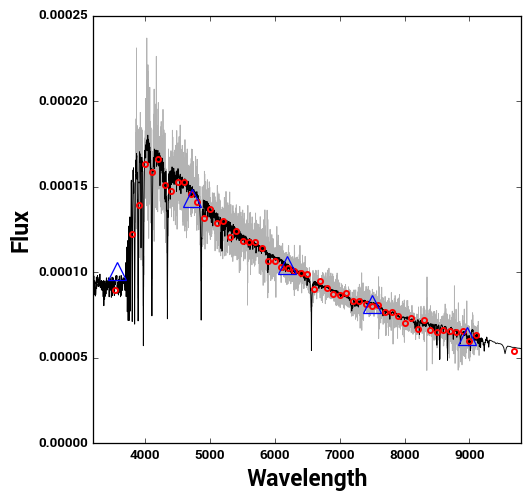

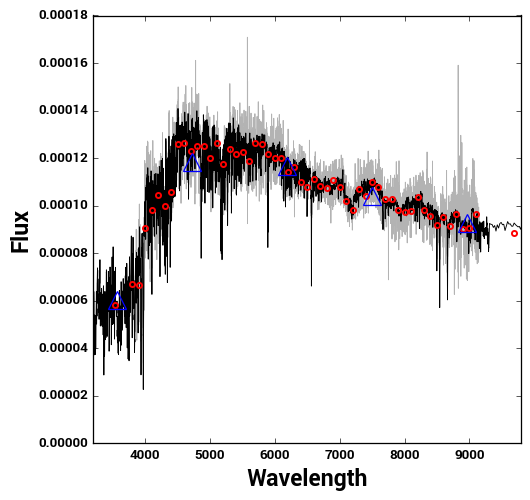

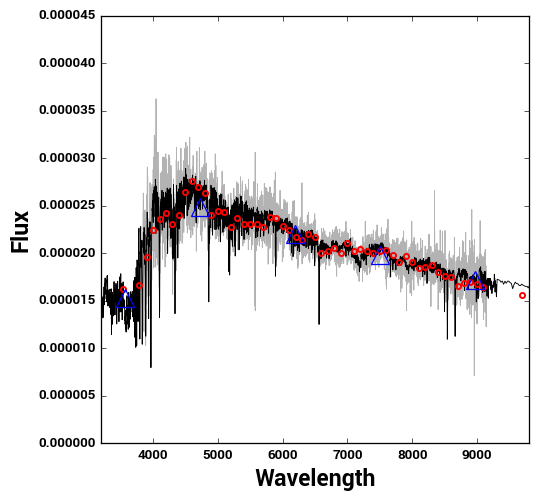

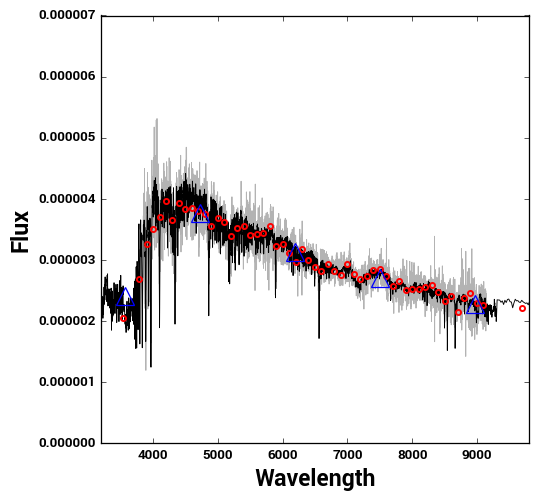

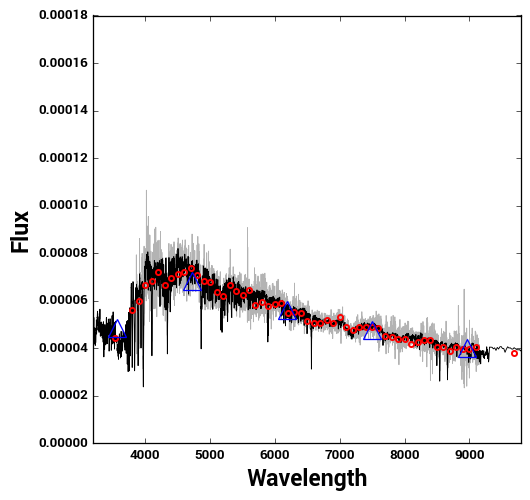

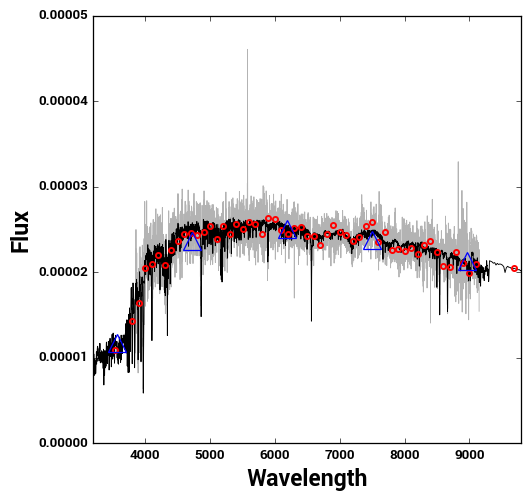

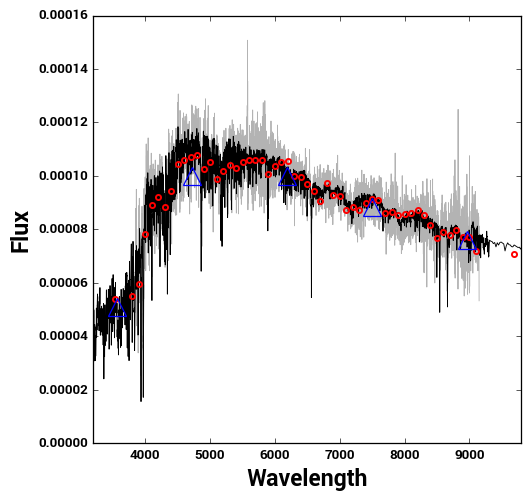

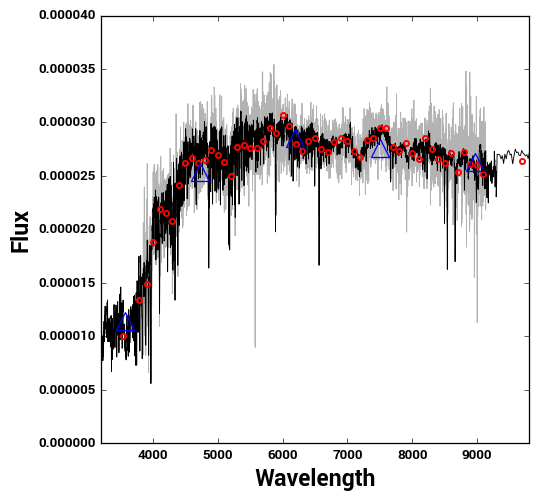

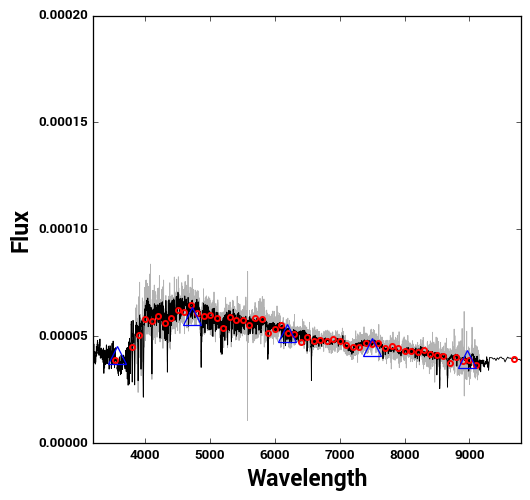

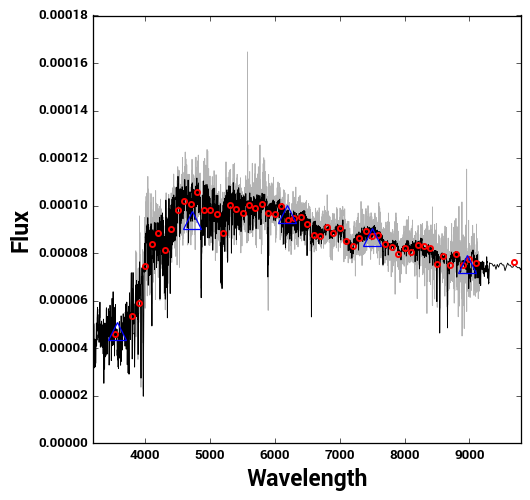

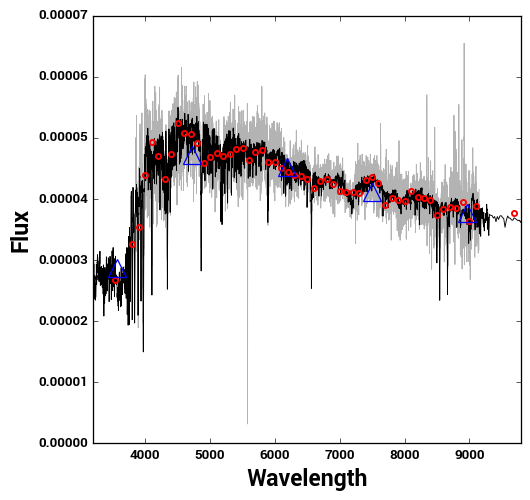

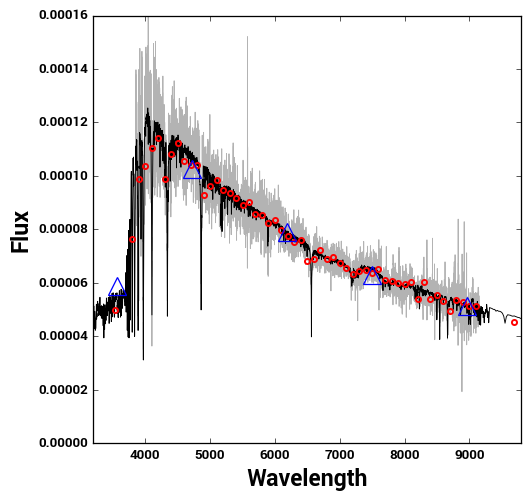

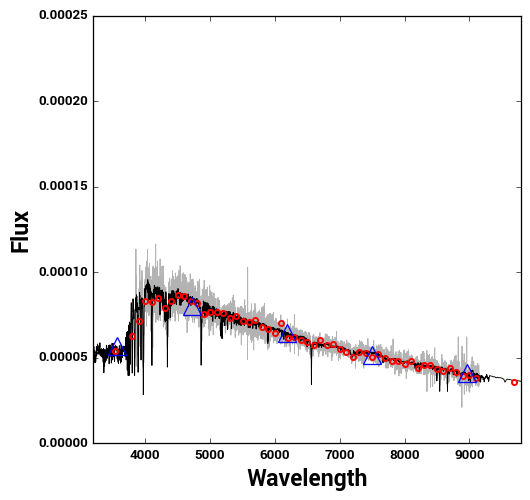

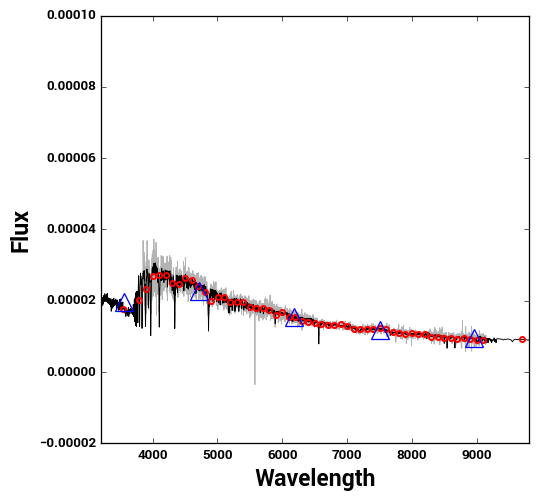

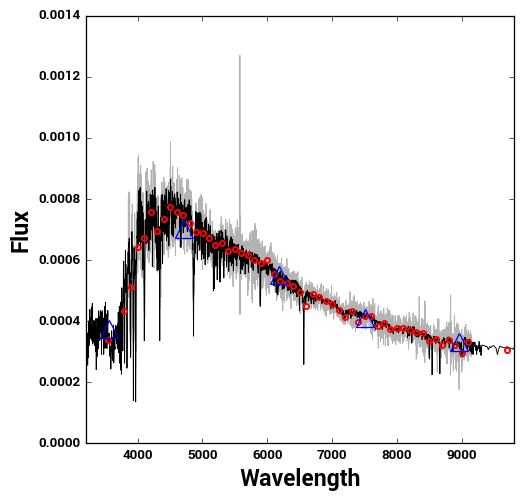

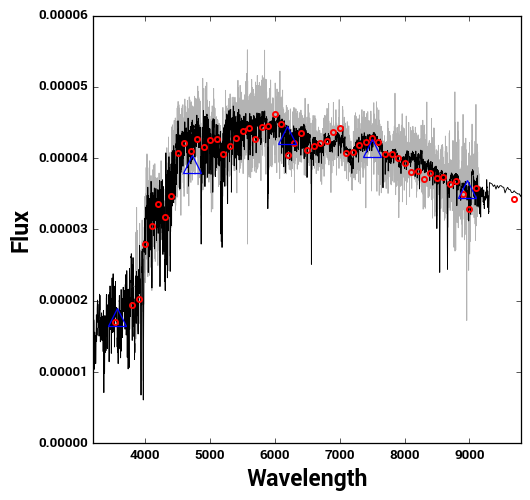

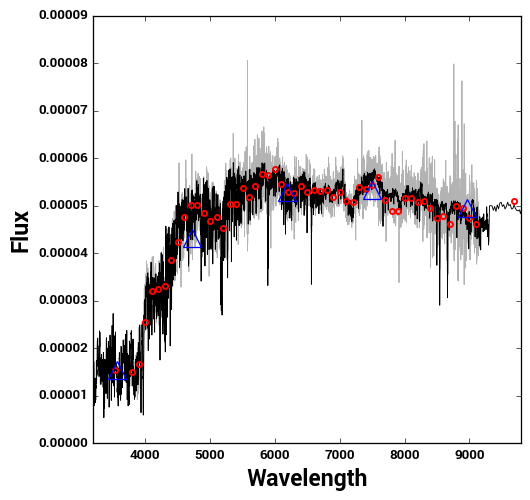

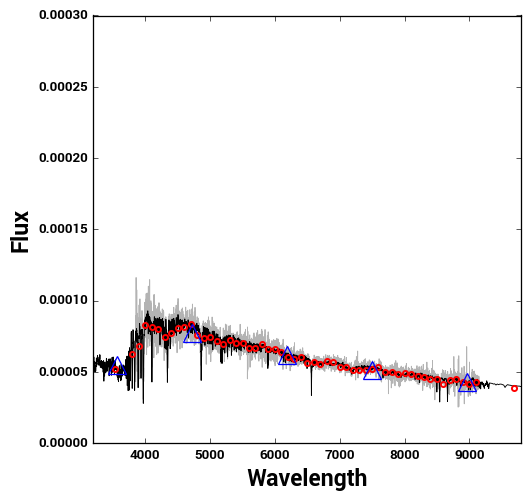

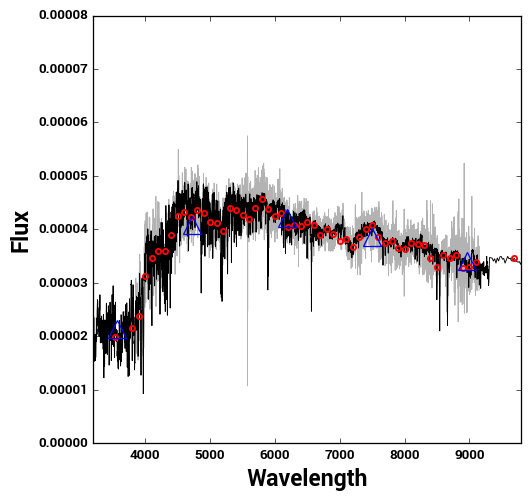

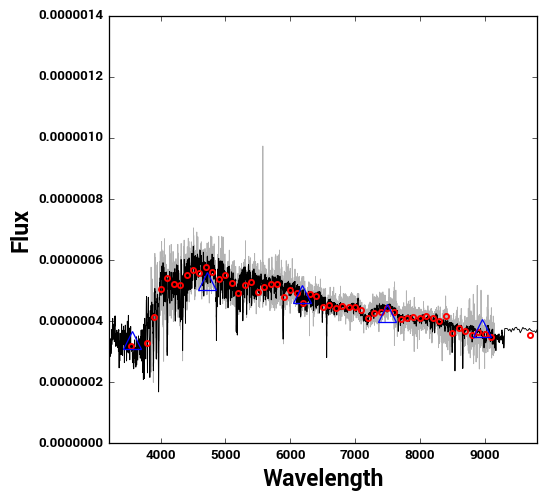

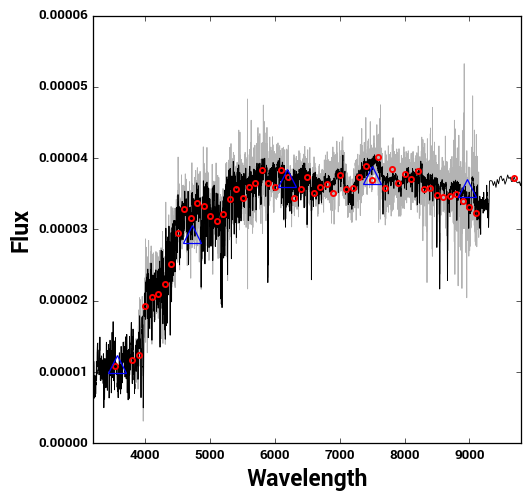

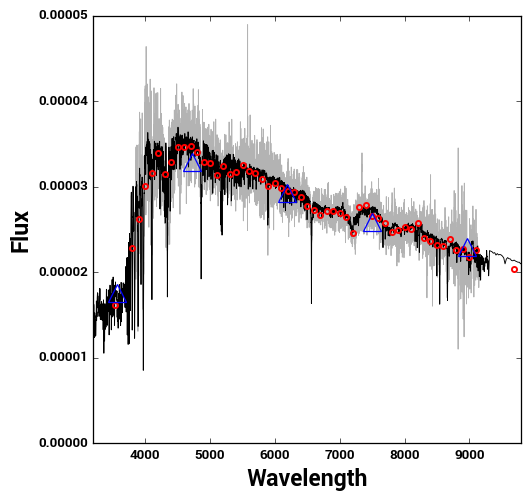

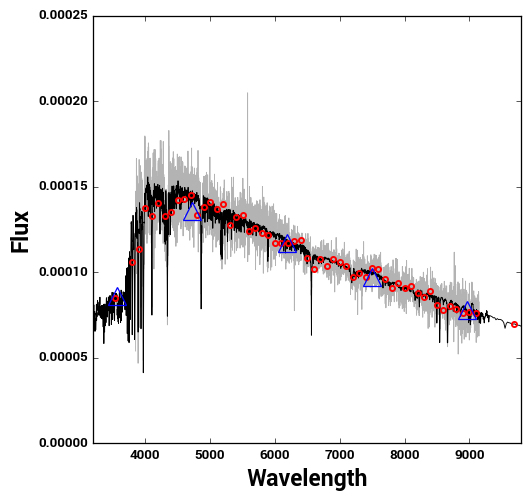

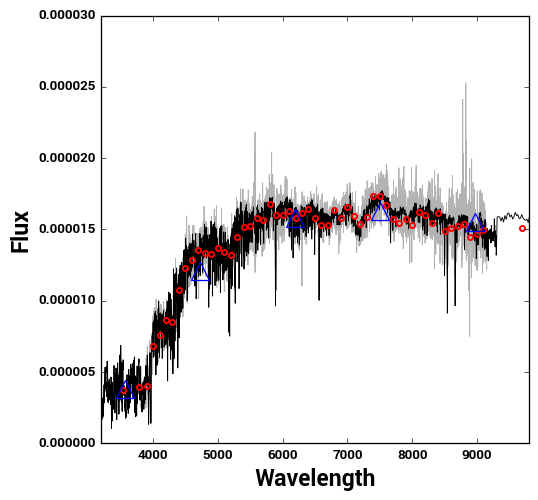

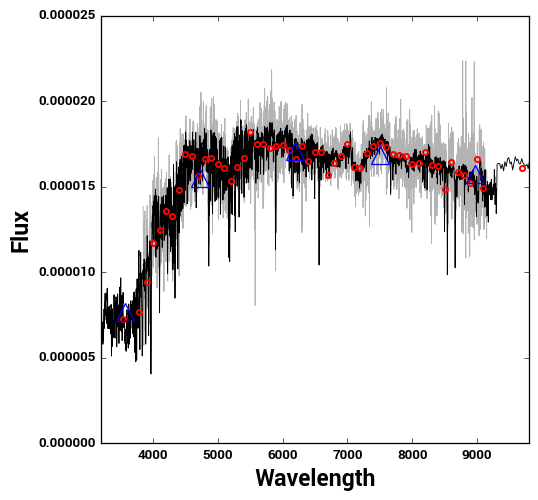

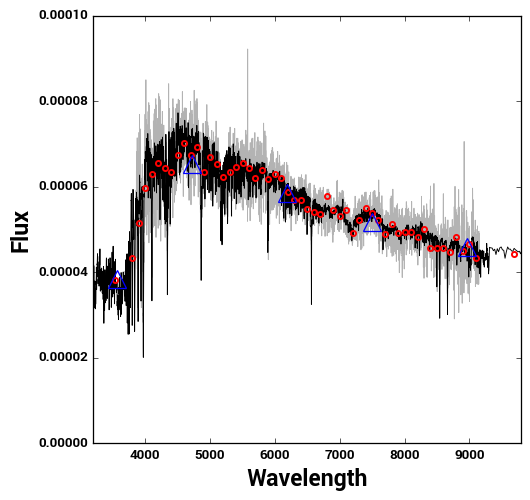

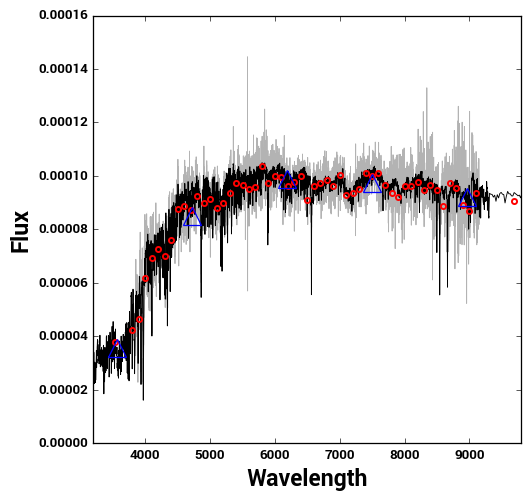

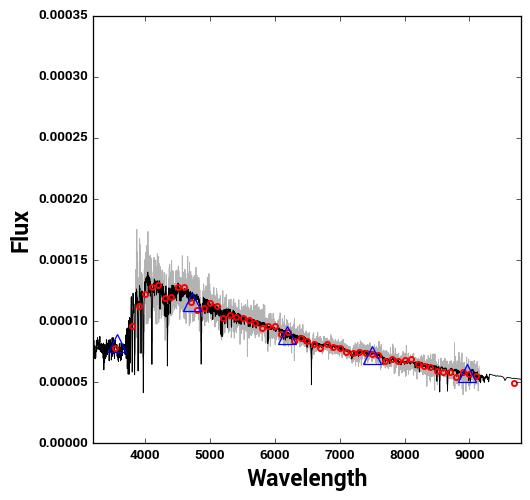

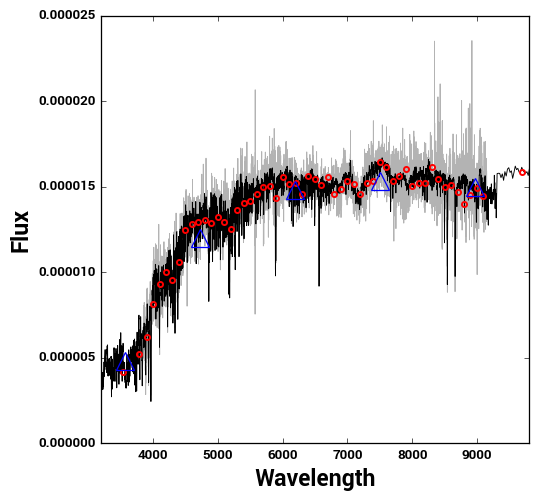

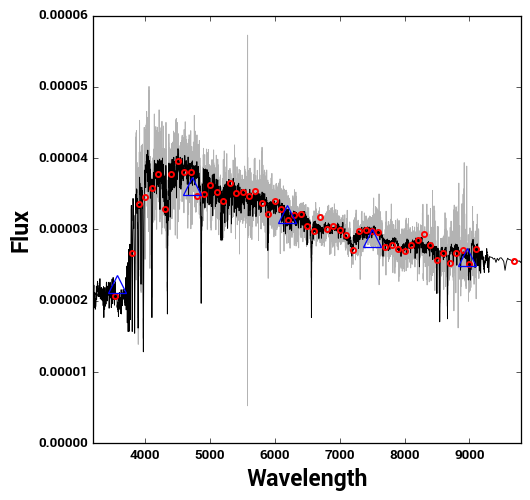

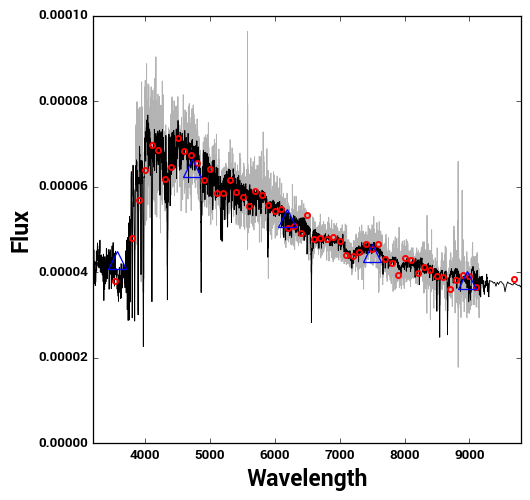

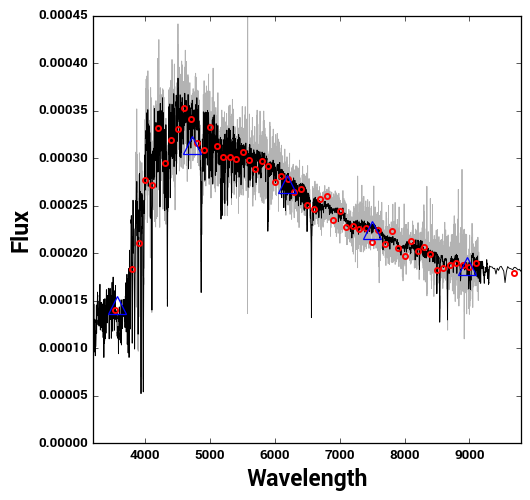

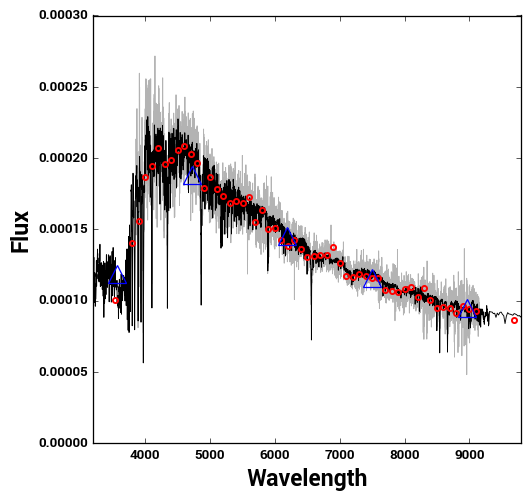

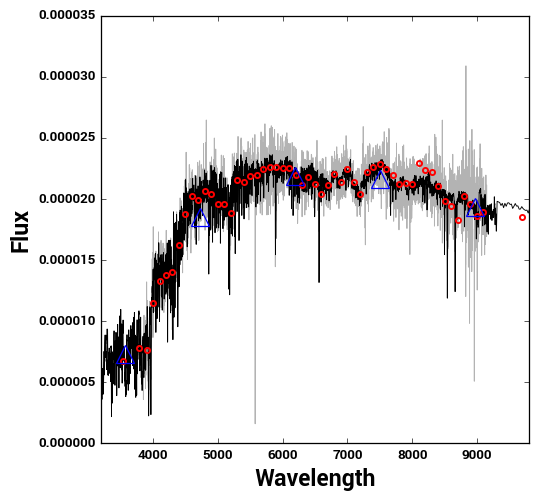

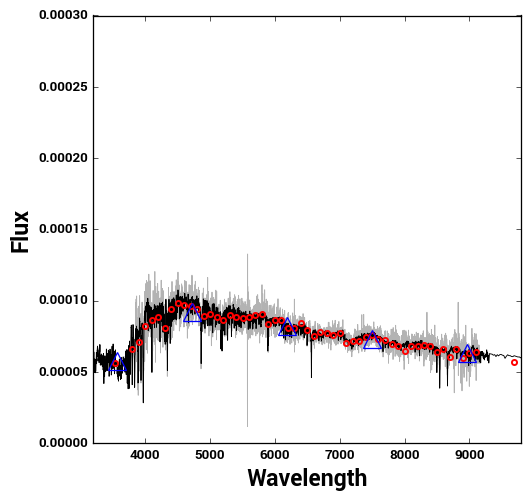

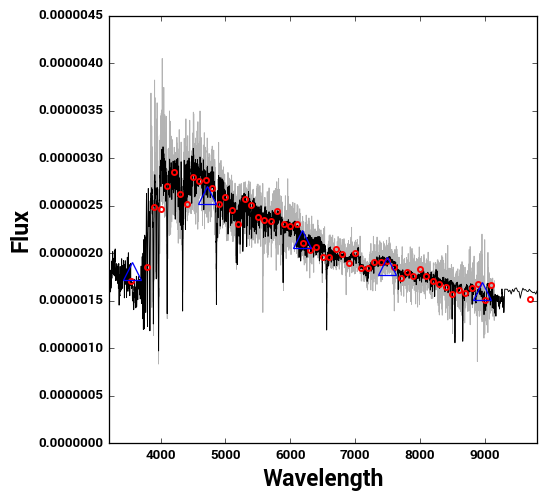

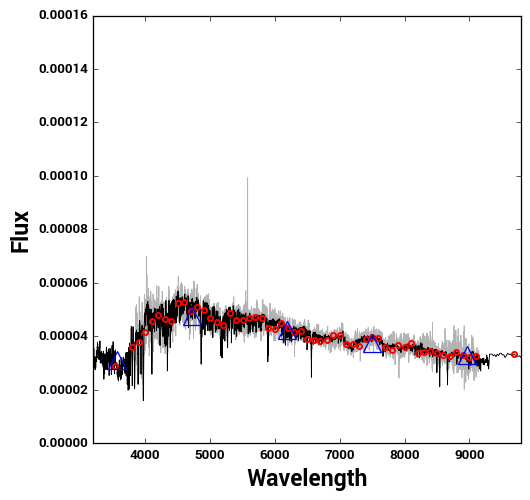

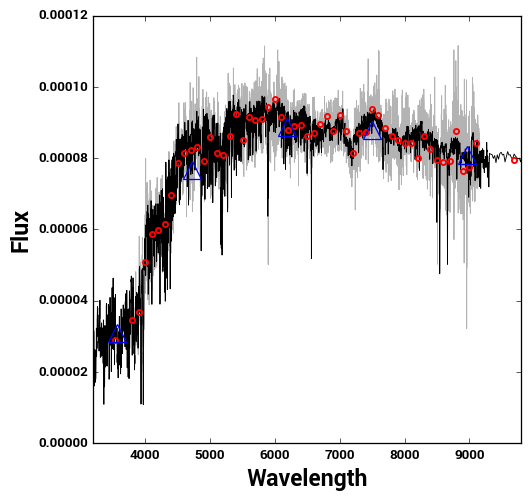

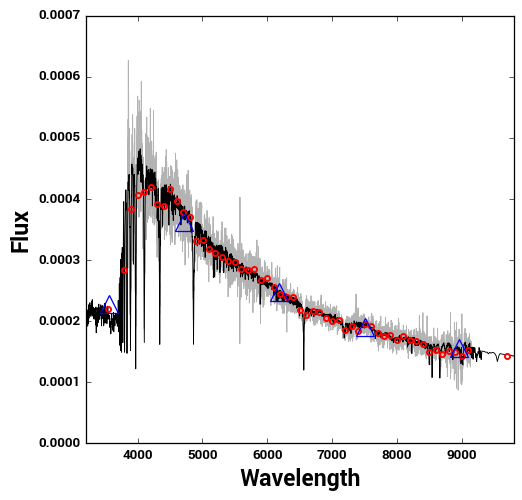

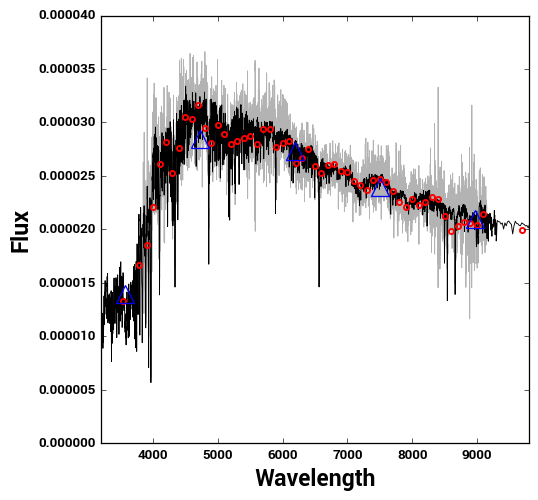

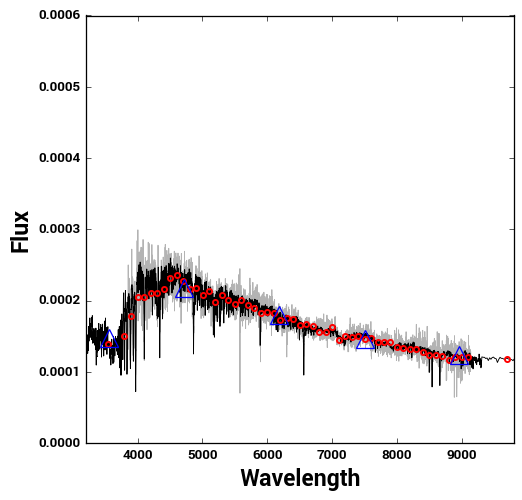

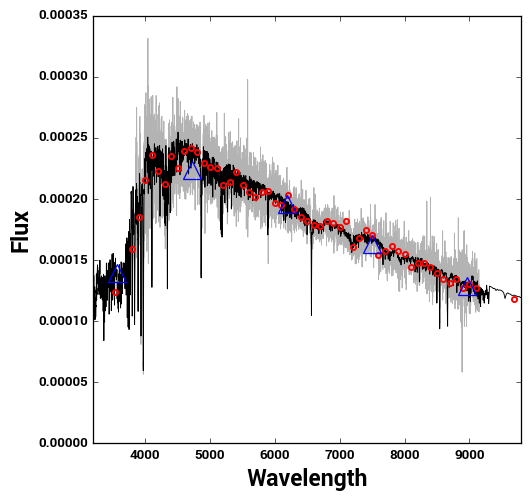

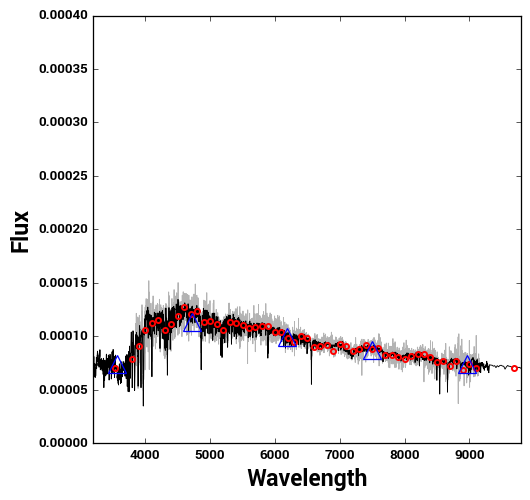

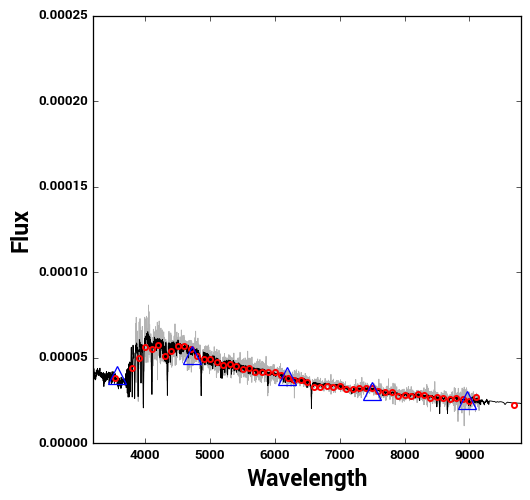

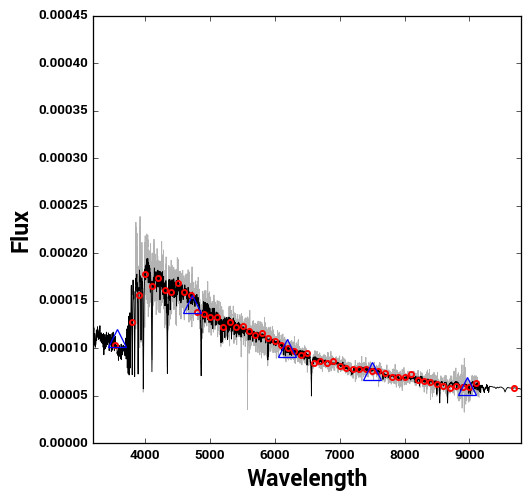

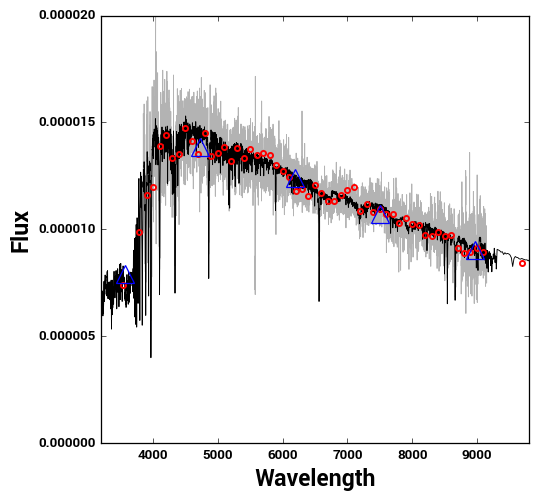

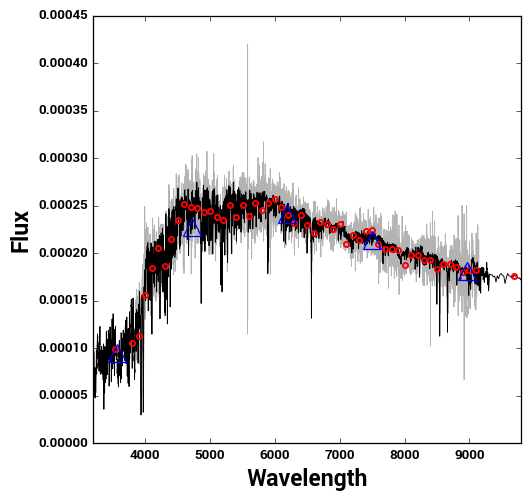

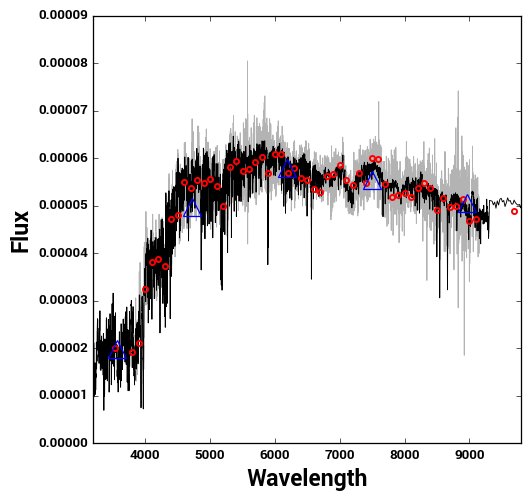

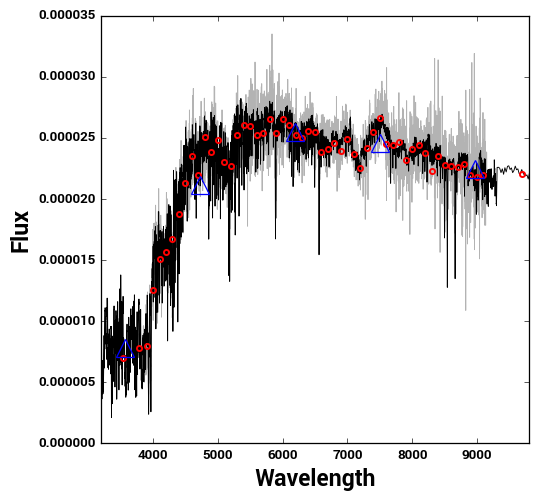

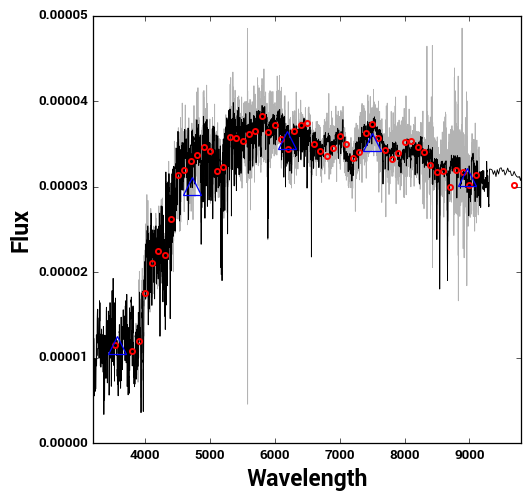

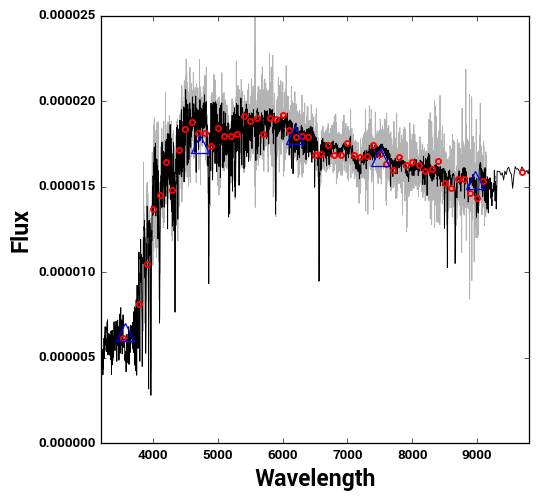

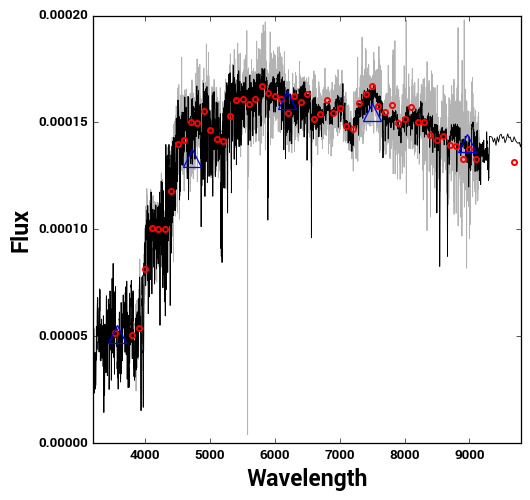

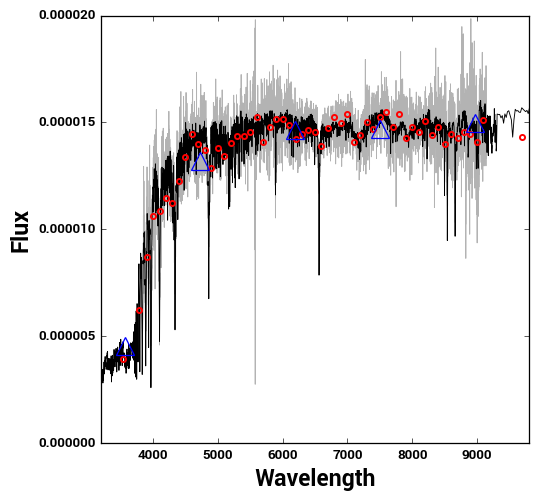

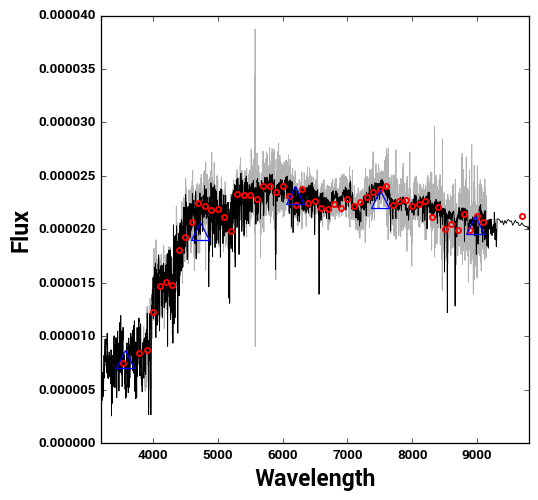

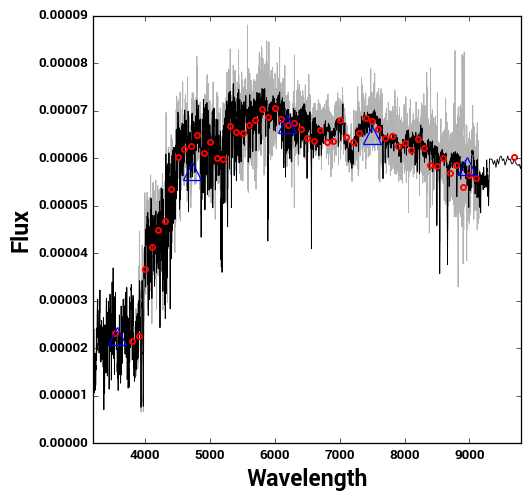

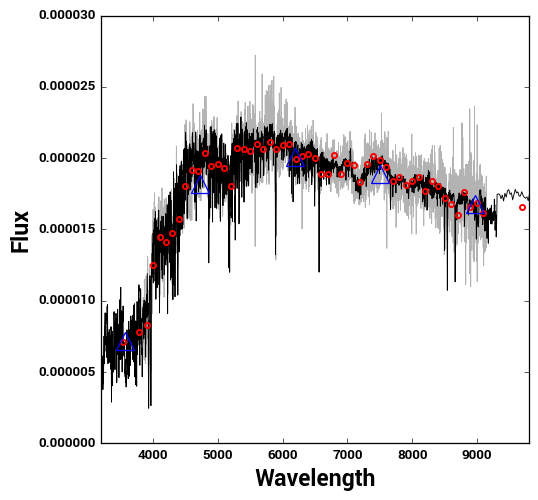

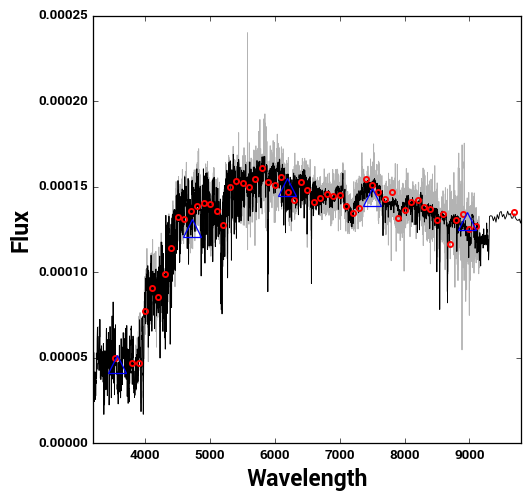

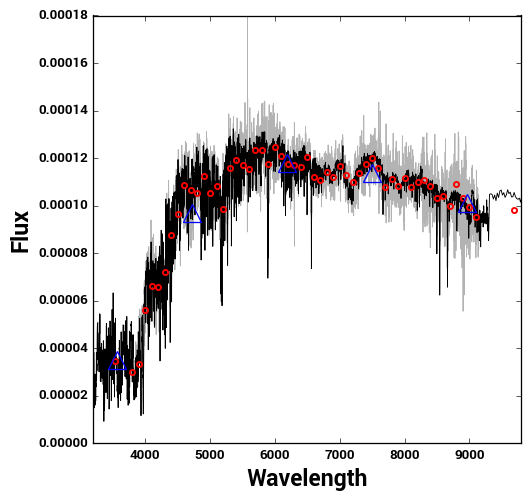

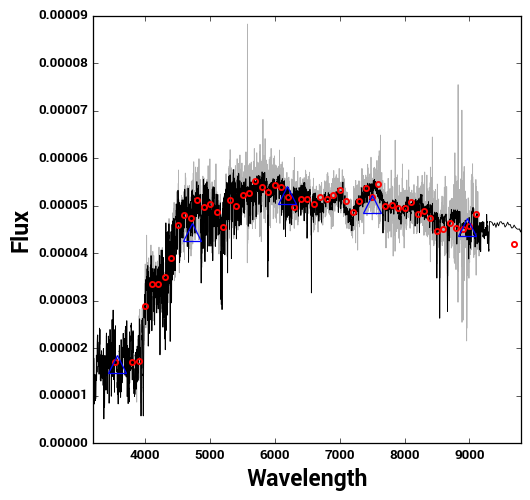

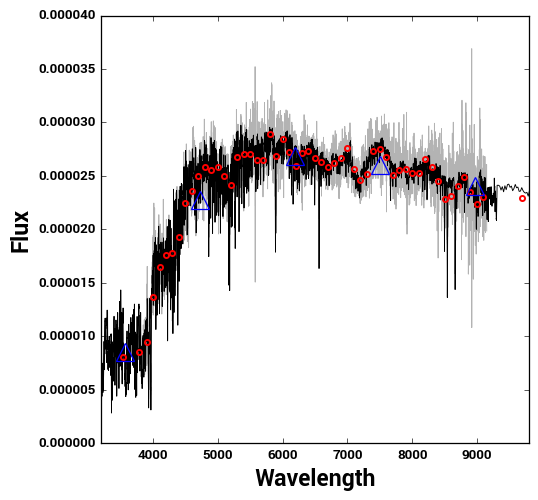

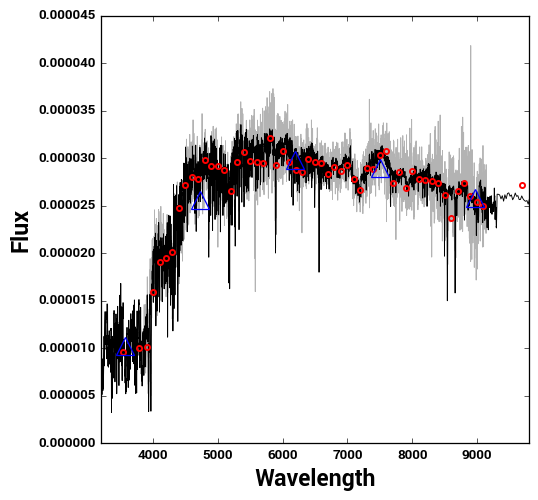

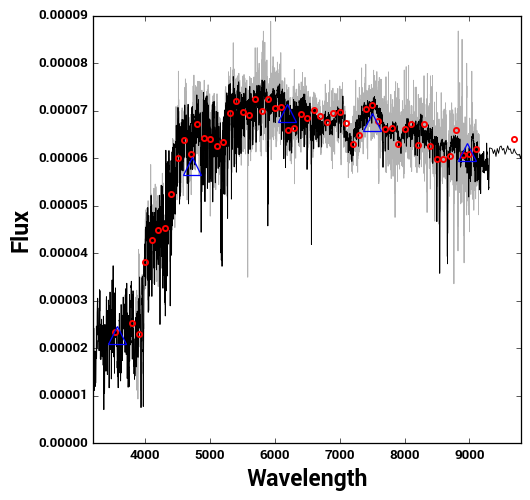

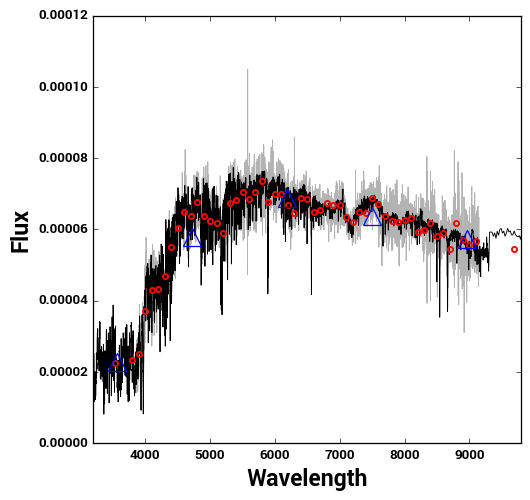

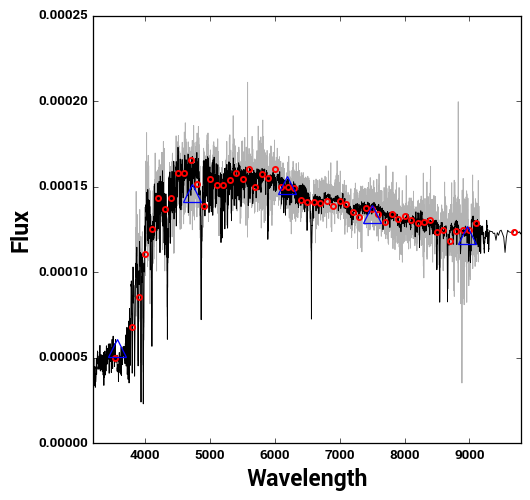

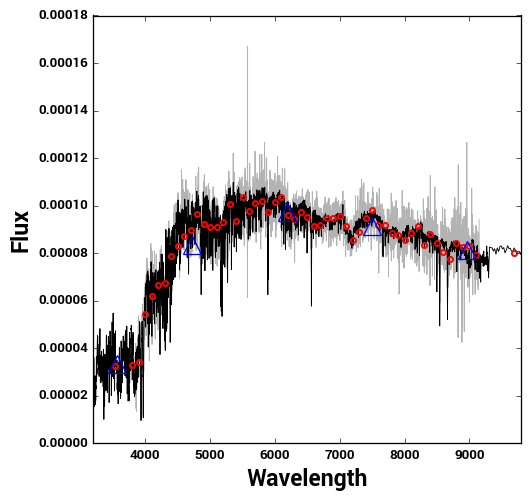

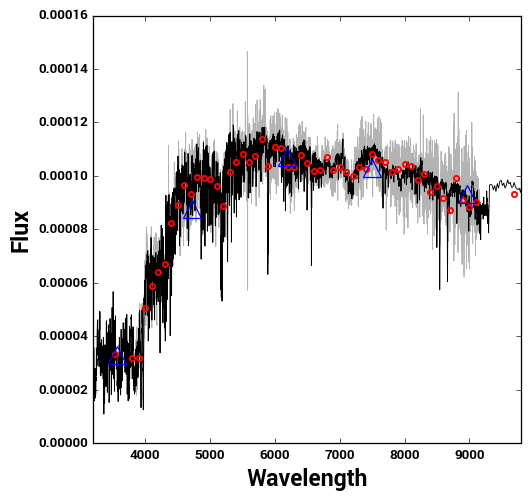

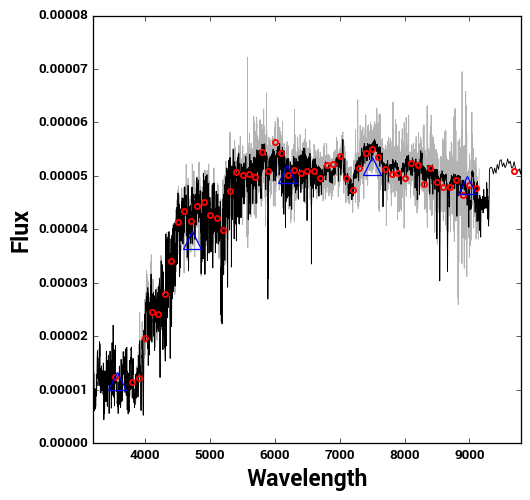

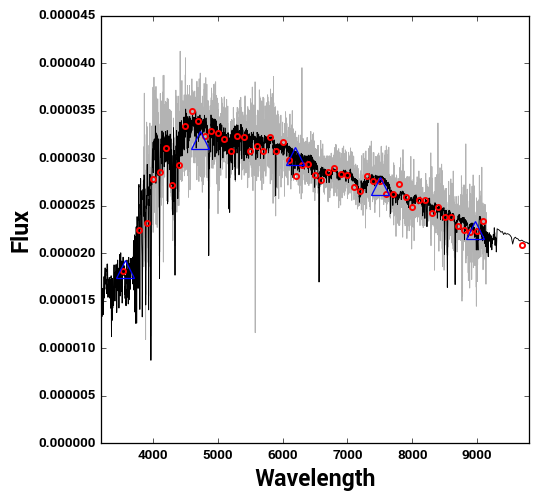

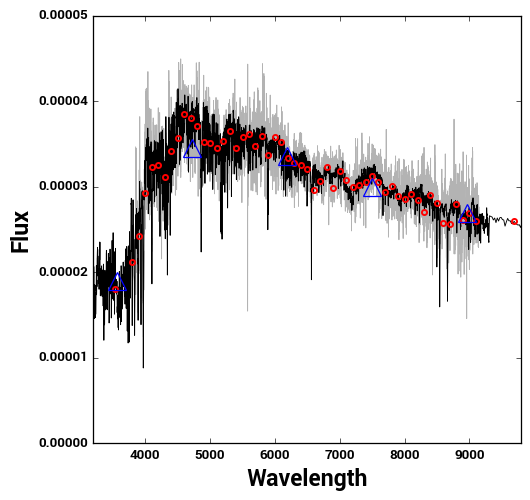

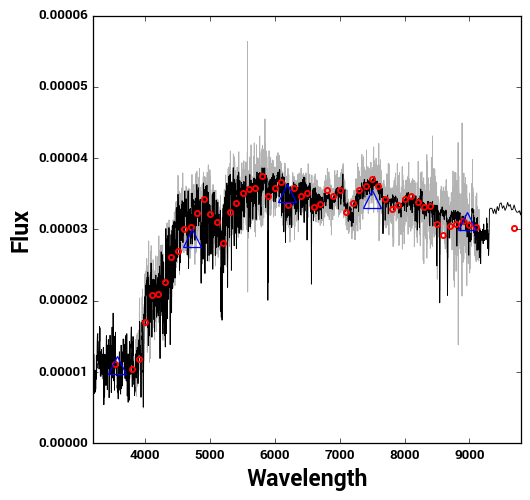

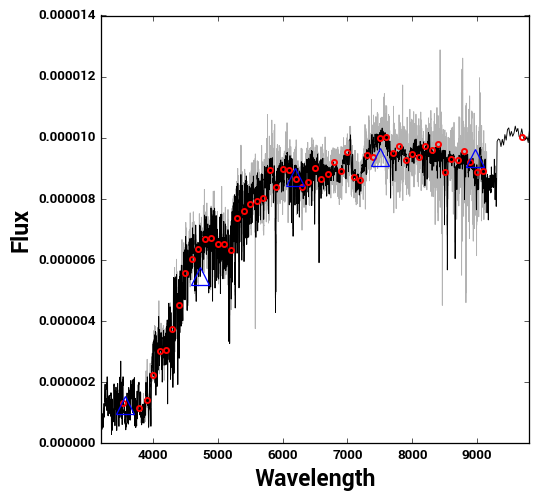

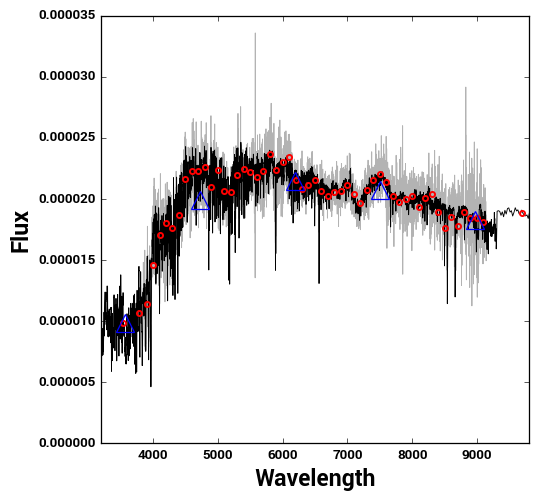

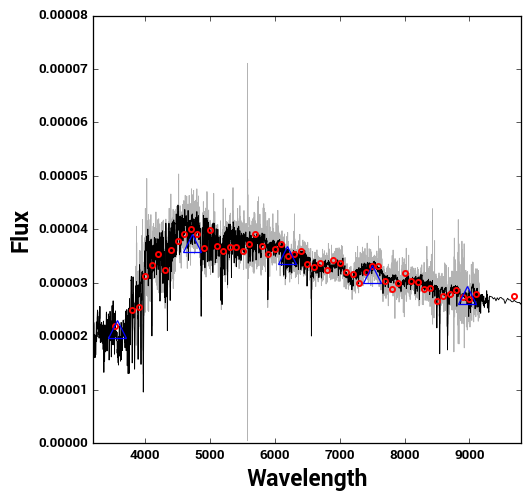

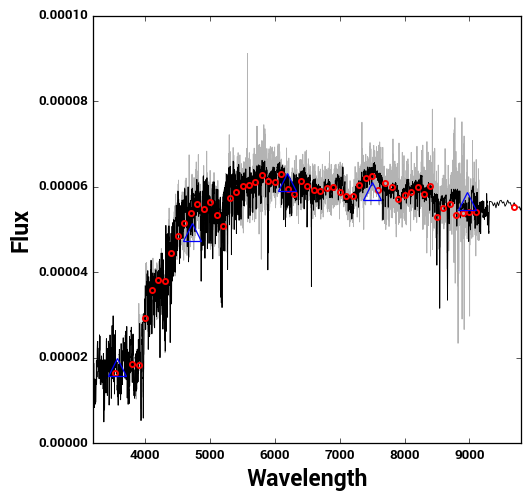

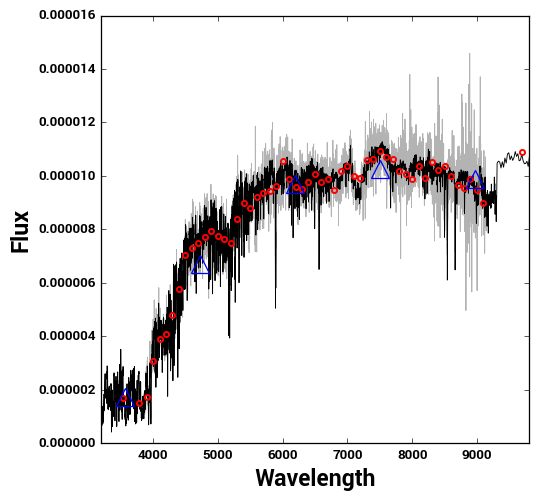

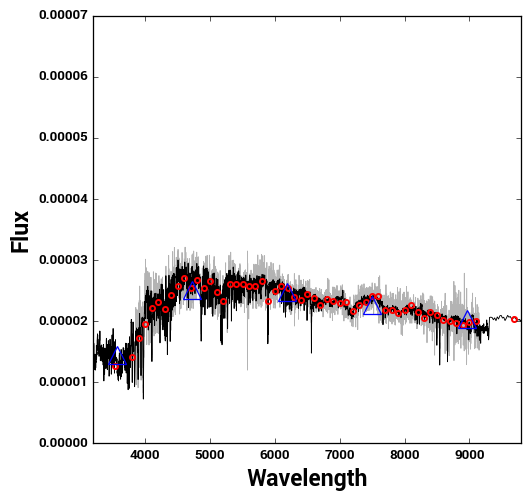

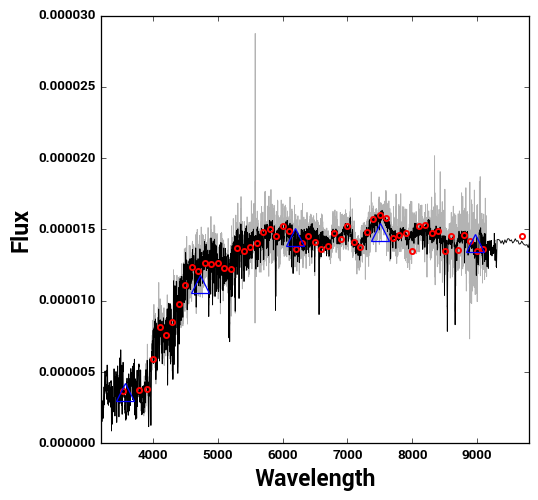

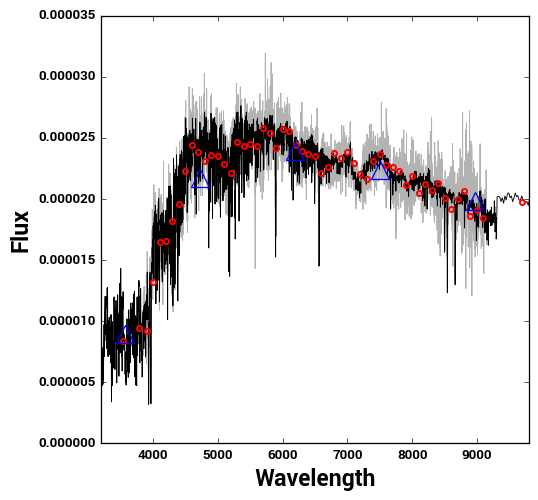

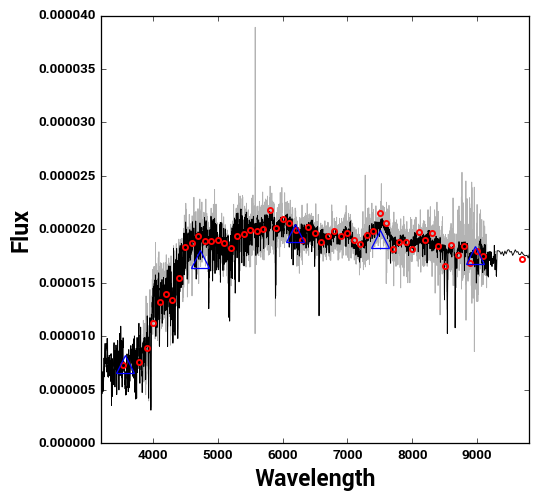

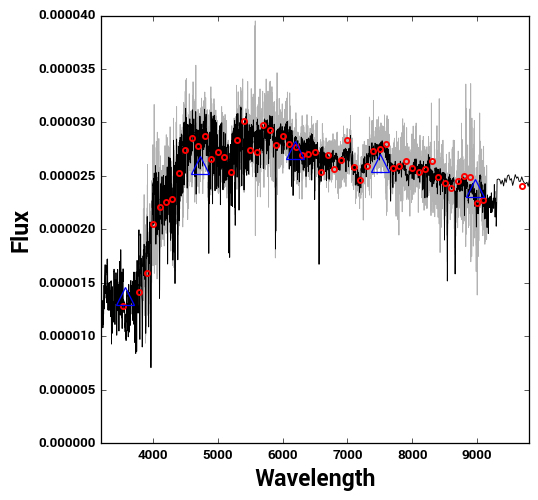

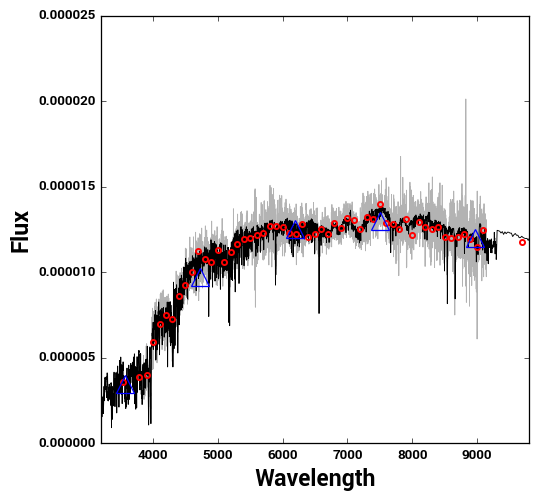

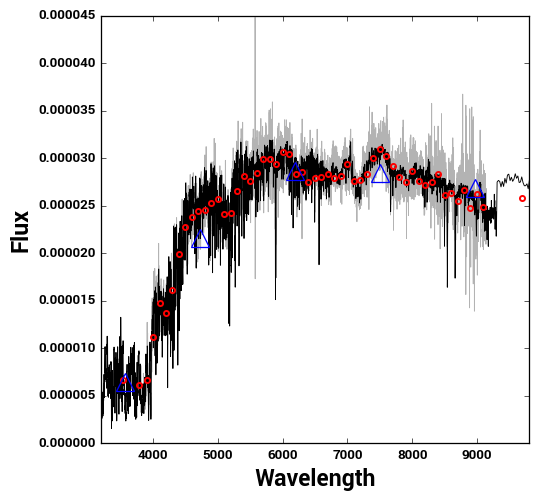

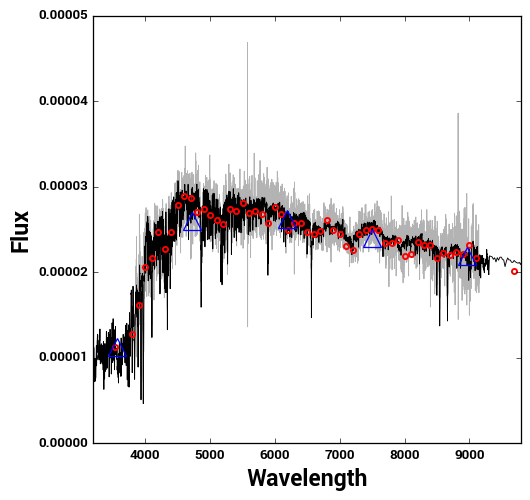

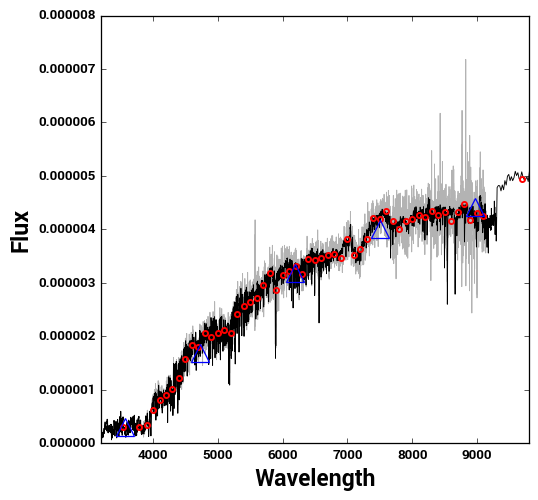

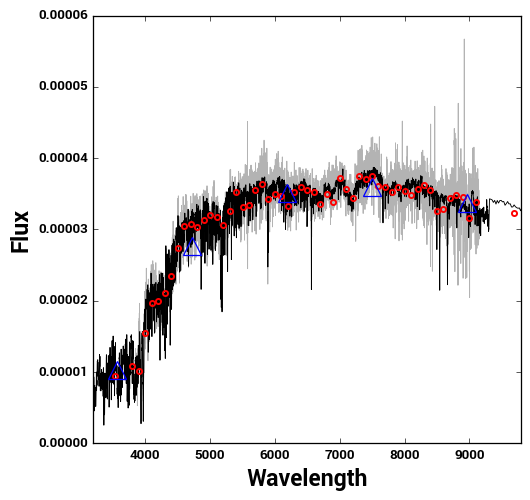

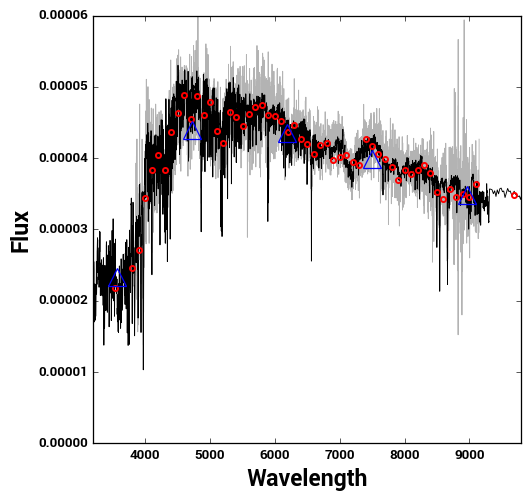

In [6]:
file = fl[2]
for file in fl:
    wl_ssag, fl_ssag = loadtxt("{0}/ssag/{1}".format(idir,file), usecols=(0,1), unpack=True)
    for i in [0]:
        wl_spec, fl_spec = loadtxt("{0}/spec/{1}_SPEC_{2:03d}.txt".format(idir,file.rstrip(".txt"),i+1), usecols=(0,1), unpack=True)
        wl_jpas, fl_jpas = loadtxt("{0}/jpas/{1}_JPAS_{2:03d}.txt".format(idir,file.rstrip(".txt"),i+1), usecols=(0,1), unpack=True)
        wl_sdss, fl_sdss = loadtxt("{0}/sdss/{1}_SDSS_{2:03d}.txt".format(idir,file.rstrip(".txt"),i+1), usecols=(0,1), unpack=True)

        figure()
        plot(wl_spec, fl_spec, "-", color="0.7", lw=0.7)
        plot(wl_ssag, fl_ssag, "-k", lw=0.7, color="k")
        plot(wl_jpas, fl_jpas, "o", mfc="none", mew=1.5, ms=4, mec="r")
        plot(wl_sdss, fl_sdss, "^", mfc="none", mew=1, ms=14, mec="b")

        xlim(3200, 9800)
        xlabel(r"Wavelength")
        ylabel(r"Flux")